# 영화 리뷰 형태소 분석 & 워드클라우드

In [70]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
from urllib.request import urlopen
import pandas as pd
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Komoran
import time
import re
pd.set_option('display.max_rows', 1000)

In [8]:
kkma = Kkma()
komoran = Komoran()

In [9]:
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [10]:
url_page = 'https://movie.naver.com/'
driver.get(url_page)

In [11]:
driver.find_element_by_css_selector('#ipt_tx_srch').send_keys('박하사탕')

In [12]:
driver.find_element_by_css_selector('#jAutoMV > ul > li:nth-child(1) > a > p > img').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#jAutoMV > ul > li:nth-child(1) > a > p > img"}
  (Session info: chrome=70.0.3538.102)
  (Driver info: chromedriver=2.43.600210 (68dcf5eebde37173d4027fa8635e332711d2874a),platform=Windows NT 10.0.17134 x86_64)


In [ ]:
driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()

In [40]:
# 영화 리뷰 클릭까지 된 상태
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [41]:
soup

<!DOCTYPE html>
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml"><body><div style="display: none;"><input name="jindo1542357125236" title="jindoCheck" type="input"/></div>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>박하사탕 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 박하사탕" property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="박하사탕" property="me2:category2"/>
<meta content="박하사탕" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/bi/mi/review.nhn?code=27219&amp;page=2" property="og:url"/>
<meta content="https://movie-phinf.pstatic.net/20180416_198/1523869200043wycgA_JPEG/movie_image.jpg?type=m665_443_2" property="og:image"/>
<meta content="1999년 봄, 마흔 살 영호는 '가리봉 봉우회' 야유회에 허름한 행색으로 나타난다.그곳은 20년 전 첫사랑..." p

In [42]:
#리뷰 페이지 url 따기
tmp = soup.find_all('ul', 'rvw_list_area')
tmp

[<ul class="rvw_list_area">
 <li>
 <a href="#" onclick="clickcr(this, 'rli.title', '', '', event); showReviewDetail(1880)"><strong>이중간첩...두가지까닭</strong></a>
 <span class="user"><a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('1880');">beha****</a> <em>2003.02.06</em><em>추천 3</em></span>
 <p><a href="#" onclick="clickcr(this, 'rli.content', '', '', event); showReviewDetail(1880);">꼭 봐야만 하는 영화가 있고 보고싶은 영화가 있다... 이중간첩은 그 둘 다다.</a></p>
 </li>
 <li>
 <a href="#" onclick="clickcr(this, 'rli.title', '', '', event); showReviewDetail(798733)"><strong>돌아갈 수 있으면 바꿀 수 있을까? -영화&lt;박하사탕&gt;</strong></a>
 <span class="user"><a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('798733');">fruc****</a> <em>2007.05.28</em><em>추천 3</em></span>
 <p><a href="#" onclick="clickcr(this, 'rli.content', '', '', event); showReviewDetail(798733);">      영화에서 감독은 보여 주고 싶어 하는 것을 여러 가지의 영화적 요소들 즉, 내러티브, 음악, 영상이 절묘하게 합쳐져서 관객의 인지 작용을 조절시킨다. 비슷한 시놉시스를 가지고 영

In [43]:
tmp1 = tmp[0].find_all('a')

In [44]:
len(tmp1)

30

In [76]:
tmp1[1]

<a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('1880');">beha****</a>

In [48]:
pattern = re.compile("\'\d+\'")

In [67]:
result = pattern.findall(str(tmp1[27]))
result

['2572207', '2012', '5']

In [ ]:
result =set(result)

In [ ]:
result

In [ ]:
#리뷰 페이지 총 숫자 따기
tmp3 = soup.find_all('span', 'cnt')
tmp3

In [ ]:
tmp4 = tmp3[0].find('em').get_text()

In [ ]:
int(tmp4)/10

In [ ]:
driver.find_element_by_css_selector('#reviewTab > div > div > ul > li:nth-child(1) > a > strong').click()

In [ ]:
current_url = driver.current_url
current_url

In [ ]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [ ]:
# 리뷰 페이지 내부에서 text 추출
tmp = soup.find_all('div', 'user_tx_area')
tmp

In [ ]:
tmp[0].get_text()

In [ ]:
tmp1 = tmp[0].get_text().replace('\n', '').replace('\xa0', '')
tmp1

In [ ]:
tmp_nouns = kkma.nouns(tmp1)
tmp_nouns

In [ ]:
one_words = []
two_words = []
etc_words = []
for noun in tmp_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

In [ ]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

In [ ]:
for word in one_words:
    print(word, end='\t')

In [ ]:
stop_words = []
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

In [ ]:
# stop_words 빼기
tmp_nouns = [word for word in tmp_nouns if word not in stop_words]
len(tmp_nouns)

In [ ]:
tmp_nouns

In [ ]:
review_nouns=[]
review_nouns.append(tmp_nouns)

In [56]:
def rev_page(keys):
    kkma = Kkma()
    url_result = []
    url_page = 'https://movie.naver.com/'
    driver.get(url_page)
    driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(keys)
    time.sleep(2)
    driver.find_element_by_css_selector('#jAutoMV > ul > li:nth-child(1) > a > p > img').click()
    
    code=driver.current_url
    pattern = re.compile("\=\d+")
    code=pattern.findall(code)
    code=code[0].replace('=','')

    time.sleep(2)
    driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")
    
    #총 리뷰 페이지 숫자 추출
    tmp3 = soup.find_all('span', 'cnt')
    tmp4 = tmp3[0].find('em').get_text()
    tmp4 = tmp4.replace(',','')
    #리뷰 페이지 url 추출
    for i in range(int(int(tmp4)/10)):
        url = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={code}&page={page}'
        response = urlopen(url.format(code=code, page=i+1))
        soup = BeautifulSoup(response, "lxml")
        tmp = soup.find_all('ul', 'rvw_list_area')
        tmp1 = tmp[0].find_all('a')
        pattern = re.compile("\'\d+\'")
        for j in range(1,30,3):
            result = pattern.findall(str(tmp1[j]))
            try : 
                result = result[0].replace("'","")
                url_result.append(result)
            except:
                pass   
        print('page',i+1,'추출중')

    return url_result

In [57]:
a1= rev_page('센과 치히로의 행방불명')
a1

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
page 29 추출중
page 30 추출중
page 31 추출중
page 32 추출중
page 33 추출중
page 34 추출중
page 35 추출중
page 36 추출중
page 37 추출중
page 38 추출중
page 39 추출중
page 40 추출중
page 41 추출중
page 42 추출중
page 43 추출중
page 44 추출중
page 45 추출중
page 46 추출중
page 47 추출중
page 48 추출중
page 49 추출중
page 50 추출중
page 51 추출중
page 52 추출중
page 53 추출중
page 54 추출중
page 55 추출중
page 56 추출중
page 57 추출중
page 58 추출중
page 59 추출중
page 60 추출중
page 61 추출중
page 62 추출중
page 63 추출중
page 64 추출중
page 65 추출중
page 66 추출중
page 67 추출중
page 68 추출중
page 69 추출중
page 70 추출중
page 71 추출중
page 72 추출중
page 73 추출중
page 74 추출중
page 75 추출중
page 76 추출중
page 77 추출중
page 78 추출중
page 79 추출중
page 80 추출중
page 81 추출중
page 82 추출중
page 83 추출중
page 84 추출중
p

['664',
 '1945371',
 '1927013',
 '669272',
 '718161',
 '504',
 '1282539',
 '1170369',
 '176580',
 '748',
 '535',
 '3780478',
 '461',
 '744',
 '665',
 '576',
 '22977',
 '2796154',
 '482',
 '512',
 '74219',
 '141548',
 '19426',
 '416795',
 '656',
 '395',
 '428',
 '1655558',
 '24731',
 '34208',
 '647',
 '1044',
 '840',
 '27713',
 '574',
 '432',
 '513',
 '902',
 '600',
 '815',
 '503',
 '18633',
 '30750',
 '287757',
 '639',
 '806',
 '423',
 '563',
 '490',
 '855',
 '581',
 '522',
 '71838',
 '28648',
 '33197',
 '1894763',
 '2105436',
 '79030',
 '22308',
 '731',
 '957',
 '457',
 '468',
 '149542',
 '13391',
 '72363',
 '547',
 '488',
 '489',
 '32851',
 '13372',
 '74989',
 '26664',
 '26461',
 '10312',
 '2562464',
 '3784469',
 '877277',
 '1708546',
 '3170485',
 '3368925',
 '512552',
 '299254',
 '674',
 '454',
 '73095',
 '458',
 '721',
 '132615',
 '2516',
 '602',
 '73526',
 '127405',
 '667',
 '10215',
 '698',
 '465',
 '66996',
 '584',
 '32573',
 '888',
 '143840',
 '525',
 '643',
 '11874',
 '8556',


In [53]:
code=driver.current_url
pattern = re.compile("\=\d+")
code=pattern.findall(code)
code=code[0].replace('=','')

'32686'

In [ ]:
url = 'https://movie.naver.com/movie/bi/mi/review.nhn?code=27219&page={page}'
response = urlopen(url.format(page=i+1))
soup = BeautifulSoup(response, "lxml")
tmp = soup.find_all('ul', 'rvw_list_area')
tmp1 = tmp[0].find_all('a')
pattern = re.compile("\'\d+\'")
for j in range(1,30,3):
    result = pattern.findall(str(tmp1[j]))
    try : 
        result = result[0].replace("'","")
        url_result.append(result)
    except:
        pass   
print('page',i+1,'추출중')

In [37]:
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>박하사탕 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 박하사탕" property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="박하사탕" property="me2:category2"/>
<meta content="박하사탕" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/bi/mi/reviewread.nhn?nid=4624094&amp;code=27219&amp;order=" property="og:url"/>
<meta content="https://movie-phinf.pstatic.net/20180416_198/1523869200043wycgA_JPEG/movie_image.jpg?type=m665_443_2" property="og:image"/>
<meta content="1999년 봄, 마흔 살 영호는 '가리봉 봉우회' 야유회에 허름한 행색으로 나타난다.그곳은 20년 전 첫사랑..." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" proper

In [14]:
def rev_crawl(r_list):
    rev_text=[]
    for i in r_list:
        url = 'https://movie.naver.com/movie/bi/mi/reviewread.nhn?nid={page}&code=27219&order=#tab'
        response = urlopen(url.format(page=i))
        soup = BeautifulSoup(response, "lxml")
    
        tmp = soup.find_all('div', 'user_tx_area')
        try:
            tmp1 = tmp[0].get_text().replace('\n', '').replace('\xa0', '').replace('\\r', '').replace('\\t', '').replace('\r', '').replace('\t', '')
        except:
            pass
        tmp2=[]
        tmp2=word_check(tmp1)
        rev_text.append(tmp2)
        print(i)
    return rev_text

In [22]:
b1 = rev_crawl(a1)

170308
280052
609800
2167344
2333716
2316489
1417825
1297473
66415
11805
1880
798733
3371802
1200502
140787
63794
151548
492356
2184805
2572207
1155827
1292392
95514
69268
688098
1086235
2317019
1711218
2505394
4497572
243286
3791135
2622788
3385676
3669166
2270115
2105810
774120
2119998
2206478
1854647
2562800
2199955
4557573
3074266
4247571
3863209
81609
141613
88845
107080
83592
865988
185637
666296
1149183
947648
405740
1277443
838231
1087362
837747
1103469
2790650
3508241
2322081
2296031
2078044
4630037
2422880
1721172
3773006
2287747
2438655
1384581
2849683
1593657
2946193
4579643
3885403
3252260
4313763
3437957
3975172
3894666
4624094
3434892
244417
234058
1150540
841282
586698
1258752
938026
1078332
1308926
2632197
3481914
2792718
1794729
4605204
2080322
4621128
2470509
2619872
3464027
1526315
2947731
2086096
1631766
3168366
1518755
3536396
4318082
4293958
4269981
4280167
4624129
4129700
3960678
3888750
4626255
3508019
3885934
189464
285898
467092
307990
855241
753038
1285907
8

In [23]:
b1

[['새해',
  '아침',
  '사람',
  '열기',
  '아침',
  '우산',
  '이창동',
  '감독',
  '작품',
  '박하사탕',
  '극장',
  '전작',
  '세계',
  '인식',
  '확인',
  '기대',
  '기대',
  '때문',
  '인파',
  '예상',
  '해서',
  '인지',
  '아침',
  '상영',
  '시간',
  '극장',
  '도착',
  '예상',
  '관객',
  '이번',
  '초록',
  '물고기',
  '작품',
  '상황',
  '우려',
  '극장',
  '영화',
  '보사노바',
  '리듬',
  '음악',
  '시작',
  '작품',
  '내용',
  '선택',
  '역설',
  '생각',
  '작품',
  '장면',
  '의미',
  '의미',
  '작품',
  '마지막',
  '부분',
  '음악',
  '철교',
  '야유',
  '회장',
  '등장',
  '주위',
  '아줌마',
  '아저씨',
  '음주',
  '가무',
  '장면',
  '사내',
  '아무도',
  '광기',
  '행동',
  '자리',
  '철로',
  '죽음',
  '절규',
  'Chapter 1',
  '내용',
  '오늘날',
  '모습',
  '노래',
  '대다수',
  '현실',
  '인간',
  '역사',
  '희생',
  '개인',
  '아픔',
  '안지',
  '주인공',
  '영호',
  '철로',
  '진해',
  '기차',
  '영화',
  '장과',
  '사이',
  '시간',
  '역행',
  '매개',
  '계속',
  '폭력',
  '역사',
  '의미',
  '영호',
  '역사',
  '상처',
  '타인들',
  '공유',
  '혼자',
  '죽음',
  '영호',
  '죽음',
  '선택',
  '포기',
  '역사',
  '개인',
  '도전',
  '결과',
  '계란',
  '위치',
  '순응',
  '소시민',
  '인식',
  '형상화',
  '장면',
 

In [13]:
url = 'https://movie.naver.com/movie/bi/mi/reviewread.nhn?nid={page}&code=27219&order=#tab'
response = urlopen(url.format(page=4624094))
soup = BeautifulSoup(response, "lxml")

tmp = soup.find_all('div', 'user_tx_area')
try:
    tmp1 = tmp[0].get_text().replace('\n', '').replace('\xa0', '').replace('\\r', '').replace('\\t', '').replace('\r', '').replace('\t', '')
except:
    pass
tmp2=[]
tmp2=word_check(tmp1)
tmp2

['개봉',
 '개념',
 '영화관',
 '인근',
 '조조',
 '영화',
 '조조',
 '영화',
 '늦잠',
 '인해',
 '이번',
 '후회',
 '시작',
 '화질',
 '실망',
 '어벤저스',
 '대체',
 '존재',
 '박하사탕',
 '상영관',
 '시도',
 '극장',
 '마이너',
 '영화',
 '장사',
 '순간',
 '시설',
 '장애물',
 '영화',
 '박하사탕',
 '거장',
 '대작']

In [12]:
def word_check(crwal_words):
    one_words = []
    two_words = []
    etc_words = []
    tmp_nouns = komoran.nouns(crwal_words)
    for noun in tmp_nouns:
        if len(noun) == 1:
            one_words.append(noun)
        elif len(noun) == 2:
            two_words.append(noun)
        else:
            etc_words.append(noun)
    
    one_words = list(set(one_words))
    two_words = list(set(two_words))
    etc_words = list(set(etc_words))
    
    stop_words = []
    stop_words.extend(one_words)
    
    tmp_nouns = [word for word in tmp_nouns if word not in stop_words]
    
    return tmp_nouns

In [ ]:
c1 = word_check(tmp1)
c1

In [ ]:
c2 = nltk.Text(c1, name='f')
c2.vocab().most_common(10)

In [ ]:
b1= ['좋은 영화는 몇번을 보아도 새로운 감동을 준다고 한다.나는 박하사탕을 이번에 세번째 보았다.2000년도에 봤었으니 거의 10년만에 보는 영화는 처음 보았을 때와는 다른 감동을 주었다.보고 나면 마음이 너무 짠하고 서글퍼진다.꽃을 사랑하고 사진을 사랑하던 그가 그렇게 까지 변해버리게 만든 요인들..자신이 원하지도 않았고 의도하지도 않았지만 받아들일 수 밖에 없었떤 그 요인들..그 요인들이 내삶엔 무엇이 있었나를 생각하면 더더욱 씁쓸해져 온다.이 영화는 시간을 거꾸로 흘러가는 기법을 사용한다. 시각적 효과로 기차길을 사용함으로써 우리를 자연스럽게 과거 여행으로 데려간다.기차길을 따라서 과거로 갈 수 있다면 우리의 삶은 얼마나 바뀔 수 있는 것일까..Chapter #1 - 야유회(1999년 봄)김영호는 20년만에 동호회 모임에 나타나서...진상을 친다.그러다 선로위에 올라가서 나 돌아갈래 하면서 외치며 기차앞을 막아선다. 처음엔 이게 뭐지 싶기도 했으나끝까지 보고 난 뒤에 왜 이 장면이 들어가게 되었는지 이해하게 되었다.첫사랑과 함께 왔던 엠티 장소...그 장소에서 이루어지는 동호회 모임..같은 장소이지만 시간을 따라 사람도 변하였고 자신도 변해버렸다.그때와 같은 노래를 부르지만 그때의 자신은 돌아오지 않는다.나 어떡해를 첫사랑 순임과 함께 엠티에서 불렀지만 지금은 죽기 직전의 첫사랑을 만났을 뿐이다.Chapter #2 - 사진기(사흘전)백수에 이혼당한 40대..세상에 닳고 닳은 말투...그가 권총 하나를 구입해서 자신의 인생을 망쳐놓은 사람 한명을 죽이려고 하고..한명에게 권총을 쏘지만 맞추지는 못했다.그러다 자신의 첫사랑 남편...순임의 남편에게 이끌려 순임을 만나러 간다..여기서 영호는 순임의 남편에게...내 인생을 망쳐놓은 딱 한명만 죽이려고 했으나 너무 많아서 누굴 죽여야 할지 몰라서 죽이지 못했다고 말한다.그렇다...영화속에 그의 삶을 보면 얼마나 많은 외부적 요소들이 그를 변하게 했는가..그렇게 소중하던 추억의 사진기도 4만원에 팔아버릴만큼...그를 변하게 한것은 진정 무엇인가?Chapter #3 - 삶은 아름답다, (1994년 여름) 자신이 고문한 사람을 우연히 음식점에서 만나게 된 영호는...화장실에서 고문당했던 그가 일기장에 적어놓았던 말을 혼잣말처럼 이야기 한다"삶은 아름답다".가구점 사장의 모습을 하고 있던 그는 그렇게 자신을 좋아해서 따라다녀서 결혼했던 아내가운전연습 강사와 바람이 나서 모텔에 있는 것을 심부름 센터를 통해서 알아내고 그 곳에 달려가 응징한다.그러면서도 자신 또한 바람을 피우고 있다.정말 삶은 아름다운가..그는 계속해서 묻고 있다...자신을 향해서도...우리를 향해서도..Chapter #4 - 고백(1987년 봄) 아내가 만삭에 애를 낳는다고 해도 그는 고문하는 일에만 전념하는 형사의 모습을 하고 있다.모든일에 권태로움을 느낀다..그러다가 한명을 고문하다가 그의 일기장에 있는 글귀를 보면서 묻는다.."삶이 아릅답다며? 정말 아름답냐?" 이렇게 묻는다..그는 모든일에 권태로워져버렸다...일도...사랑도...그러다 용의자를 잡으러 간 잠복근무지에서카페 여종업원과 하루밤을 보내며..그를 순임이라 부르며 목놓아 운다...하지만 과거로는 돌아갈 수 없고...그저 그렇게 울 뿐이다...그렇다....울 뿐이지...무엇을 할 수 있단 말인가..그의 아내를 사랑하지 않지만 그의 아내는 이미 만삭이고..그리워 하는 그 사람은 어디 사는지도 알지 못하고..이미 시간은 지난것을..Chapter #5 - 기도(1984년 가을) 신참 형사가 된 영호는 주위 사람들에게 떠밀려서 결국 자신의 폭력성에 눈뜨게 된다...그는 그런 일을 혐호했지만..그런 일을 받아들일 수 밖에 없는 시스템에 속해져있었다...그가 처음으로 고문했던 사람의 똥이 손에 묻었고 그걸 닦고 있었는데 순임이 찾아왔다..순임은 손을 보니 영호씨가 맞다고 말하며...변했지만 착한 손은 그대로라고 말한다..타인의 강요와 내재된 폭력성으로 자신의 순수했던 모습을 거부한다.그는 그 것을 자신이 사랑하던 순임 대신 자신을 짝사랑하던 홍자를 택함으로써그 길로 가기로 결정한다..순수했던 자신은 이미 더렵혀져서 다시 돌아갈 수 없다고 믿었기에..아무리 씻어도 똥의 냄새는 잘 안가신다는 형사 선배의 말처럼...더러움에 한번 몸을 담군 그는 순수했던 그의 첫사랑을 받아들일 수 없었나보다...Chapter #6 - 면회(1980년 5월)순임은 영호를 면회가지만 5.18 광주 민주화 운동으로 그를 면회할 수 없었다.순수하였던 그는 살인의 광장에서 한 여학생을 살려주려 노력하지만 오히려 그 노력때문에 그 여학생은 죽고만다...자신의 의도와 다르게 일어나는 세상일들...이 것을 어찌 설명하랴...이 책임은 어찌한단 말인가..사실 난 여기까지 보고 나서야 그가 왜 그렇게 광기어린 사람으로 변해가야했는가 하는감독의 의도를 동감할 수 있었다...Chapter #7 - 소풍(1979년 가을) 순수했던 그와 그녀...사진으로 이름모를 들꽃을 찍는것이 꿈이라던 그들...아무튼 좋은 영화는 늘 새로운 감동을 주는것을 이창동 감독의 영화를 보면서 느끼게 된다.이 영화는 우리에게 묻는다..삶은 아름다운가?인생에 일어나는 일들은 누구의 책임인가.?순수함에서 더러움으로 변해가는 것을 누가 책임져야 하는가.?영화를 다 본 다음에도 그 해답은 주어지지 않는다..그 질문들만 있을 뿐....그 누가 대답할 수 있으랴...순수했던 우리가 이렇게 변한 책임을 져야할 자를... ',
 '박하사탕(2000)★★★★1. 시간의 회귀, 삶의 질곡에관한 기억영화는 어둠으로부터 출발한다. 온 스크린이 어둠으로 가득 메워진 채, 한줄기 빛을 향해 기차가 달여가고 있다. 아니 거꾸로 가고 있다. 뒤로 가는 자동차와 사람들을 가로지으며 한 개인의 역사가 회귀라는 기차를 타고 거슬러 올라가고 있다. 영화의 출발점은 순차적인 시간의 흐름으로 본다면 사실상의 결말이다. <박하사탕>은 한 인간의 비극적 삶의 과정과 그 연원을 찾아 시간을 거슬러 올라가는 역순행적 구성을 취하고 있다. 감독은 무엇때문에 상식적이고 일반적인 방식을 거부하고 이처럼 모험적인 시도를 하고 있으며, 그 의도는 무엇인가? 이러한 역순행적 구성의 효과가 갖는 성취중 탁월한 부분중 하나는 영화와 관객간의 거리감 조절이다. 감독은 영화의 서두에 이미 사실상의 결말을 관객에게 제시함으로써, 과연 인간 김영호가 자살을 선택할 수 밖에 없었던 이유의 대한 궁금증을 촉발시키며 긴장감을 늦출 수 없게 만드는 것이다. 또한 이것은 한 인간의 삶이 유기적인 연관관계를 맺고 있음을말한다. 인생의 많은 시간들이 어찌 각기 독립된 파편적인 요소로 존재할 수 있겠는가? 모든 인간의 삶은 과거와 현재 그리고 미래가 서로 유기적으로 긴밀하게 연결되어 있는 것이다. 20년이라는 시간 동안 한 개인의 역사를 파헤쳐가는 <박하사탕>은 잃어버린 순수한 시간으로의 여행이다. 그 속에는 현실과 유리될 수 없는 개인의 작은 역사가 힘겨운 모습으로 살아 숨쉬고 있다. 그러나 그것은 살아있는 모습이 아니다. 인간이라는 존재의 의미를 실존과 본질의 합으로 보았을 때, 김영호는 실존하는 자신에 대한 본질을 이미 상실했기 때문이다. "나 다시 돌아갈래"라는 절규하는 한 인간, 그는 무엇때문에현실에 조화되지 못한 채 비틀거리며 과거로의 회귀를 외치고 또한 어디로 돌아가고자 하는 것인가?2. 단절 : 비극과 절망의 시작, 그 좁혀지지 않는 혹은 좁힐 수 없는 간극 <박하사탕>은 다분히 3인칭 관찰자적 시점을 유지하고 있다. 이것은 관객이라는 제3자가 감독이 연출하고 의도한대로 영화속 내러티브가 주는 사실적 기록을 감상적 유희없이 받아들일 수 있는 장치로 작용한다. 관객은 김영호가 겪에 되는 커뮤니케이션의 단절과 그것을 극복할 수 없는 인간과 시대적 한계를 비교적 냉정하게 바라볼 수 있다.시대적 논리와 흐름에희생된인간의 단절은 다음과 같이 요약할 수 있다. 첫째, 김영호 자기자신의 내부와의 단절이다. <박하사탕>은 끝끝내 김영호 스스로 자신의 인생의 의미, 존재감을 확인하는 기회를 허락하지 않는다. 이것은 사회와 역사가 개인에게 강요하는 폭력적 논리와 맞물려 삶의 방향을 상실케했던 비극적 한국현대사에 그 리얼리티를 기초함으로써 논리적 개연성을 담보한다. 둘째,자기내부와의 단절은 주변 인물들과의 단절로 이어지며, 그 폐해 또한 타인에께까지 확산된다. 「기도」에서 영호의 첫사랑인 순임이 찾아와 대화를 나누던 중, "손이 착하게 생겼다"라는 순임의 말에 영호는 홍자의 허벅지를 쓰다듬으며, 순임을 향해 자신의 손을 내보인다. 순임을 만나기 전에 영호는인간이하의 폭력적인 고문을 하고 나오턴 터였다.그런데순임의 그 말을 듣는 순간, 참을 수 없는 모멸감을 느꼈던 것이다. 시대적인, 정치적인, 이념적인논리에휩쓸려 폭력에 물들어가고 있는 영호는 다른 사람들이 순수했던 자신을 기억하는 것을 부인할 수 밖에 없었다.순임이 기억하는 순수한 청녕 대학생 영호는 더이상어디에도 없었기 때문이다. 인력(人力)으로 극복할 수 없는 이러한 커뮤니케이션의 부재는 그 좁혀지지 않는, 좁힐 수 없는 간극이 <박하사탕>에서는 역사적 상황과 맞물려 개인에게 폭력적 억압의 기재로 작용하여 비극의 원인이 되고 있다. 3. 상처와 아픔 : 절름발이 인생 이창동 감독은 <박하사탕>을 시간에 관한 영화라고 했다. 시간의 흐름을 통해서 펼쳐지는 개인의 역사는 사회와 국가라는 거대한 담론에 묻혀 타자화된다.광주에서 불의의 사고로 여학생을 죽음으로 몰아넣은영호의 영혼은학생들의 시위를 진압하는 과정에서 다리에 총탄을 맞은 육체와 함께 절름발이가 되어가고 있었던 것이다. 영호의이러한 불완전함은 정신적 동요와 함께 재발하고 만다. 「사진기」에서 순임을 만나고 계단을 내려오면서, 「고백」에서 군산에 내려와 술집여자와 하룻밤을 보낸 후 범인을 검거하던 중, 그리고 「기도」에서 자신을 찾아온 순임을 떠나보낸 후 영호는 다리를 절룩거린다. 또한 과거의 상처로 인해얼룩지고 일그러진 그의 인생은 방향성을 상실한다. 순임을 떠나보낸 후, 자전거로 원을 그리며 한없이 같은 곳을 돌기만 한다. 순수에서 폭력으로의 전이는 이미 돌이킬 수 없을 만큼 삶을 왜곡시켜 놓았다.4. 김영호와 우리들의 공통분모 김영호의 삶은 영화속에서 만들어진 가상과 허구의 인물의 이야기이고, 또 특정한 일부 개인의 이야기로 쉽게 한정지워 치부해 버릴 수도 있다. 그러나 <박하사탕>의 김영호의 이야기를 우리들과는 관계없는 누군가의 이야기로 단정짓기에는, 우리의 역사가 부정하고 있지 않은가. 우리는 그의 삶을 허구적이라고만 단언할 수 없다. 감독은 김영호의 불행과 빅그의 출발점을 광주 민주화운동과 연결짓고 있다. 우리들의 자화상이 김영호에 투영되어 있다. 타자의 논리에 시대적, 정치적인 거대 담론에 휘말려 얼마나 많은 이들의인생이폐허가 됐었던가. 순수하고, 수줍음 많으며 꽃을 사랑했던 김영호는 공권력의 가해자인 동시에 피해자인 것이다. 애초부터 가해자는 없고 피해자만 있었는지도 모르겠지만. 5. 삶은 아름답다! 삶은 아름답다? 시원한 달콤함이 입안을 가득메우는 박하사탕, 그 박하사탕을 참 좋아한다고 말했었던 영호. 인생은 분명 박하사탕처럼 달콤하지도 시원한 개운함도 보장할 수 없음을 그의 삶을 통해 다시금 입증된다. 언젠가 오랜 시간이 나 역시, 인생의 뒤안길에 서게 되었을 때 스무살이었었던 그 때를 박하사탕의 맛으로기억할 수 있을까? 과거는 후회가 본질이며, 언제는 후회는 완행열차처럼 찾아오는데 말이다. 2000년도 1학기 <현대문화론> 수업 때 "현대문화체험기"의 일환으로 작성했던 리뷰이다. 지금으로부터 8년전에 쓴 것이라 지금 읽어보니 참으로 조잡한 구석도 여기저기 눈에 띄어, 수정을 했지만 지금보다는 오히려 훨씬 더 적극적으로 영화를 이해하려 했다는 것 만큼은 분명한 것 같다. <박하사탕>에서 "씨바! 연기는 말야, 이런거야!"라고 마치 말하는 것같은 활화산표 광적인 연기를 보여주신 본좌 설경구는 너무나 인상깊었다. 그의 연기가 <박하사탕>의 절반 이상을 완성시킨 것 같다. 대학시절 한 선배는 이창동 감독의 영화가정치적이라고 했었다. 다분히 부정적인 뉘앙스였다. 그를 비난하고 싶은 생각은 없다. 맞는 말이기도 하니까. 그러나 영화가 정치적이라는 이유로 그 고유의 가치를 평가절하 당한다거나, 비난 받아야 할 이유는 그 때나 지금이나 눈씻고 찾아봐도 없다고 생각한다. 어차피 인생은 한 판의 정치니까.',
 '밑도 끝도 없는 트집, 광기스런 소리지름과 욕설, 종 잡을 수 없는 불뚝 성질, 식구들의 힘듦보다 남에게 어떻게 보여지는가를 중시함, 가끔은 초딩보다 더 초딩스러운 면모와 옹졸함.나의 아버지. 한 때는 죽을만큼 밉고 싫어서 저절로 눈물이 흐르게 만들던 사람. 언제부턴가 나는 아빠가 내게 "사랑한다. 사랑해."를말할 때, 뭐라 대답해야할지 망설이기 시작했다. 부녀간의 훈훈한 모습을 연출해내고 아빠의 만족스러움을 위해서라면 나 역시 "사랑해요."를 말해야했겠지만 그 말이 힘들었다. 사랑이란 말로 나 자신의 감정을 속이고 싶지 않았다. 궁금해졌다. 왜 나는, 도대체 어떤 이유로 \'사랑스런 나의 아빠\' 라는 말보다 \'그 사람\' 이라는 말이 더 속 편해진걸까. 그건 내가 아빠를 사랑하기 이전에 그를 이해하지 못했기 때문이었을 것이다. 아빠는 다른 가족들이 생각했을 때 웃고 넘어갈 수 있는 것을 트집잡아 엄마를 달달 볶았고, 기어이 상대를 짓누르고 나서야 후련해지는 사람같았다. 그럴 때마다 나는 속으로 \'도대체 왜 저러는 거야?\'를 외쳤지만, 단 한번도 실제로 그가 왜 그러는지에 대해 생각해본 적은 없었다. 그 대신 또 한 번 나를 낳아준 저 사람을 원망했고, 엄마를 불쌍히 여겼고, 나 스스로를 다독였다. 박하사탕이라는 영화가 내게 가르쳐준 것은 우리 아버지 역시 또 하나의 김영호일 수 있다는 생각이다. 그는 처음부터 고래고래 소리지르는 사람이 아니였으며, 처음부터 광기어린 눈으로 사람을 쳐다보는 사람이 아니었음을 알았다. 내가 태어나기 전, 30여 년의 세월이 나의 아버지에게 무엇을 가르쳤는지, 내가 태어나고 난 후임에도 불구하고 너무 어려, 나의 기억 속에 희미한 약 10년 간의 시간동안 그에게 무슨 일이 있었는지 난 무던히도 소홀했다. 좀 더 정확히 하고 싶다. 나는 몰랐던 것이 아니라 알고 싶어하지 않았으며, 다분히 고의적인 무시를 저질렀던 것이다. 이미 알았던 사실조차도 잊기에 급급했다. 이전부터나는 알고 있었다. 내가그렇게 미워하고 증오했던 나의 아버지인 그 남자는 태어날 때부터 입천장이 붙어있는 장애를 갖고 태어났음을, 그래서 그가 무슨 말을 해도 보통 사람들은 잘 알아듣지 못했음을, 그로 인해 놀림받고 이유없이 맞고 다녔음을, 그럼에도 불구하고 심각할 정도로 무식한 그의 아버지는 그가 성인이 될 때까지도 수술을 시켜주지 않았었음을. 매일같이 종처럼 부려먹는 아버지 밑에서 오토바이를 고치느라 공부할 시간이 없었음에도 대학교에 붙었지만 결국 학교에 보내주지 않았다는 것을. 북적이는 가족을 누구보다 원하지만 정작 자신의 누나와 의절하고 지내는 아픔이 있는 사람이라는 것을. 박하사탕 안에서 김영호가 되돌아 갔던 시간처럼, 나의 아버지도 그런 시간을 되돌아가게 된다면 분명 지금의 그와는 참 많이 다를 것이다. 지금의 눈보다는 훨씬 더 맑은 눈을 갖고 있지 않았을까 생각해본다. 여전히나는 나의 아버지를 진심으로 사랑한다고 자랑스럽게 말할 수 없다. 그러나 지금 나는 아버지를 이해하고, 진심으로 그가 가엾다. 그래서 정말 늦었지만, 지금에서라도 속죄의 눈물을 흘린다.내가 치를 떨 정도로 싫어했던 그의 욕설과 고함, 옹졸함은 아마도 그가 받았던, 평생 치유될 수 없는 상처와 고통을 대변하고 있는지도 모른다. 이제 나에게는 \'그 사람\'이라는 말보다 \'가여운 나의 아빠\'라는 말이 더 속 편해지게 되었다. 나는 \'박하사탕\'에서 나의 \'아버지\'를 보았다.',
 '사람은, 특히나 한국과 같은 사회에서 남자는나이가 서른이 넘어가서 제도권 사회에 정식으로 편입되면서부터 점점 무언가 잃어간다는 느낌을 필연적으로 느끼게 된다.그게 어린 시절의 순수성이라던지, 세상을 바로 보는 시각이라던지...뭐 그런 단어로 쉽게 정의내리기는 힘들다.주머니에 든 휴대폰, 타고다니는 자동차, 살고 있는 집...그 모든 사물들이 이전에는 그저 자신의 주위에 있는 사물일 뿐이지만,어느 순간 가져야 할 것, 있어야 할 것이 되고정신차리고 보면 그것들을 위해서 코피터져가며 살고있는 자신을 발견하게 된다.그래서 가끔씩 추억에 빠져 다시 돌아가고 싶다고 속으로 외치지만,다음날 아침에 일어나면 그것도 잊고 다시 인파 속에 파묻혀 출근하고,일하고 점심먹고 담배 한대 피고 일하고 퇴근하고 술 한잔 하고 인터넷 뉴스를 뒤적이다가쓸데없는 댓글 몇 줄 달고 카메라를 DSLR로 바꿔야 할텐데, 차 할부는 언제 끝나나,보험을 하나 들어야 되나... 이런 저런 생각에 그런 아쉬움은 잊혀진다.그리고 어느 순간 다시 돌아가고 싶다고 생각하고,그렇게 회환과 망각을 되풀이하면서 나이는 한 살 한 살 더 먹어간다...이건, 그래서 잔인한 영화다.다소 정치적인 색채가 들어있는 듯한 인상을 주기에 거부감이 드는 사람도 있겠지만,80년의 일이 허구도 아니고, 고문 수사가 허구도 아니다.이걸 가지고 정치색 운운하는건 너무 짧은 생각이고 세상 경험이 부족한 사람이다.세상 사는 건 이미 날마다 80년의 광주고 밀실에서 당하는, 혹은 행하는고문이다.비록 영화는 주인공의 외모까지 남루하게 만들어 시각적인 효과를 주고 있지만가구점 사장이던 때 잘 나가던 영호도 이미 망가질대로 망가진 상태이다.우리도 넥타이 매고 멀쩡하게 돌아다니지만 점점 망가져가긴 마찬가지다.박하사탕은 그런 인생의 무게, 돌이킬 수 없음을 그린 영화이다.직장을 때려치고 무엇을 한들 어린 시절 순수했던 순간이, 그리고 순수한 영혼이 회복될까?그게 불가능한 걸 알기 때문에 우리는 포기하고 망각하고 사는거다.아니면 철길에서 인생의 마지막 장면까지 돌아가고 싶다고 외치는 걸로 끝날 뿐이다.그래서 슬픈 영화다.인간이, 인간의 인생이 돌이킬 수 없음을 너무나 잘 말해줌을.제 아무리 돈을 많이 벌어도 제 아무리 선행을 많이 하고 살아도문득 문득 인생 리셋하고 싶어질 때가 많은 게 인간이다.내 인생이 더러워지고 있다고 생각할 때마다 떠오르는 영화다,',
 '이영화를 지루하다고 생각하고 아예 보지 않으려는사람들이 보이던데저또한 영화보는 수준이 높은 인간이 아닙니다.박하사탕을 안보면 당신은 진짜 바보입니다.바보가 되기싫으면 당장 비디오 가게로 가서박하사탕을 빌려보십시요저의 이 강요가 당신의 삶을 다시보게 해줄껍니다.그리고 시간가는줄 모르고 봤습니다.아주 재미도 있습니다.제발 좀 꼭 보세요.',
 '2000년으로 접어든 새해 둘째날의 아침에는 비가 내리고 있었다. 새로운 천년을 맞이하는 사람들의 열기를 잠시 식히려는 듯 제법 차갑게 내리고 있었다. 이 아침에 우산 하나를 가볍게 챙겨들고 이창동 감독의 두 번째 작품 <박하사탕>을 보기 위해 극장으로 향했다. 전작에서 보여 주었던 세계에 대한 치열한 인식을 다시 한 번 확인할 수 있으리라는 기대와 함께……. 기대 때문인지 붐비는 인파를 예상해서인지 어쨌든 아침도 거른 채 1회 상영 시간에 맞춰 극장 앞에 도착했다. 그러나 예상과는 달리 관객은 그리 많지 않았다. 이번에도 <초록 물고기> 때와 같이 작품성만을 인정받는 안타까운 상황이 벌어지지 않을까 하는 작은 우려를 뒤로 한 채, 드디어 극장 안으로 들어섰다. 영화는 보사노바 리듬의 음악과 함께 시작되는데, 작품의 내용으로 볼 때 곡 선택이 다소 역설적이지 않은가 하는 생각이 들었다. 그러나 작품의 엔딩 장면에서 또다시 흐르는 그 곡을 들으면서 거기에 그냥 지나칠 수 없는 의미가 숨어 있음을 느낄 수 있었다(그 의미는 작품의 마지막 부분에서 살펴보도록 하자). 음악이 사라지고 철교 밑 야유회장이 등장한다. 우리 주위에서 흔히 볼 수 있는 아줌마 아저씨들이 그야말로 음주가무를 즐기는 장면 속으로 한 사내가 찾아든다. 그는 아무도 끼워 주지 않는 틈을 비집고 들어가 광기어린 행동을 보여 준다. 그리고 그 자리를 박차고 나가 철로 위에서 죽음을 맞이한다. “나 다시 돌아갈래”라는 절규와 함께. 이와 같은 Chapter 1의 내용은 바로 오늘날의 우리 모습이다. 먹고 마시고 춤추고 노래하는 대다수의 현실적인 인간들은 역사에 희생된 개인의 아픔을 끌어 안지 못했다. 그래서 주인공 영호는 철로 위로 뛰어든다. 이 때 돌진해 오는 기차는, 영화의 장과 장 사이의 시간적 역행을 매개하는 것으로, 결국 멈추지 않고 계속되는 폭력적인 역사를 의미한다고 할 수 있다. 영호는 역사에 의해 받은 상처를 타인들과 공유하지 못한 채 혼자 괴로워하다가 죽음을 맞게 되는 것이다. 영호의 죽음은 그가 스스로 선택한 것이라는 점에서 중요하다. 그것은 삶의 포기라기보다는 역사에 대한 개인의 도전이 아니었을까? 물론 결과는 계란으로 바위치는 격이었지만, 순응적인 소시민의 삶에서 벗어나려는 깨어 있는 인식이 섬뜩하게 형상화된 장면이다. 이후의 작품 내용은 역순행적으로 제시되는데, 이는 한 인물의 파국에 대한 원인을 분석해 내는 효과를 거두고 있다. 일반적인 순행 구조의 영화가 인물의 궤적을 좇아가기 편하게 이야기를 진행시키는 데 비해, 이 작품은 인물에 대한 들여다보기를 시도함으로써 관객들에게 적극적인 영화 읽기를 요구하고 있다. 여기에서 소설가로서의 감독의 역량이 드러나는데, 서사 구조에서의 플롯이 갖는 의미를 적절히 보여 준 것이라 생각된다. 이처럼 견고한 플롯은 감독의 작품 속에 진지한 탐구 의식을 담아 놓는 그릇이 되고 있다. Chapter 2는 영호가 죽기 3일 전의 이야기인데, 여기서 그는 자신의 전 재산을 털어 권총 한 정을 구한다. 그리고 그것으로 자신의 삶을 파괴한 이를 처단하고 자신 또한 목숨을 끊으려 하고 있다. 이 때, 그의 앞에 ‘윤순임’의 남편이 등장한다. ‘윤순임’은 영호의 첫사랑으로 작품 전체에서는 ‘순수’를 상징한다. 영호의 가슴에 늘 죄책감으로 남아 있는 그녀의 죽음은 순수의 소멸을 의미하면서 영호의 죽음에 대한 직접적인 동인으로 작용한다. 그녀가 영호에게 남긴 사진기는 스무살 청년 때의 영호가 지녔던 꿈과 열정이었는데, 그는 결국 그것마저 팔아 버리고 만다.이제 그의 앞엔 현실만이 남은 것이다. 하지만 그는 사진기 속에 들어 있던 옛날의 필름을 꺼내 보며 눈물을 흘리고 만다. 여기서 확인할 수 있는 것처럼 영호라는 인물은 순수와 현실 사이에서 끊임없이 갈등하고 방황한다. Chapter 3에는 현실적으로 타락해 가는 영호와 그의 아내 ‘홍자’의 모습이 그려져 있다. 가구점 사장이 되어 경제적으로 안정된 삶을 누리던 영호는 사무실 여직원과 바람을 피우고 홍자는 운전 교습 강사와 바람을 피운다. 영호는 아내의 불륜 현장을 덮친 날에도 여직원과 만남을 갖는데, 바로 그렇게 떳떳하지 못한 순간에 한 사내를 만나게 된다. 그는 영호가 형사였던 시절에 고문을 당했던 운동권 학생으로, 이 작품에서 그 역시 순수와 열정을 상징한다고 할 수 있다. 그래서 영호는 그 사내에게 말한다. “삶은 아름답죠?”라고. 지극히 현실적인 모습으로 변해 버린 자신과는 달리 순수를 간직하며 화목한 가정을 꾸리고 있는 사내의 모습에서 영호는 삶의 아름다움을 느낀 것이다. Chapter 4에는 형사인 영호가 등장한다. 온 나라 안이 학생들의 시위로 들끓던 시절, 영호는 소위 ‘고문 경찰’로 악명을 날리고 있었다. 학생을 잡아 놓고 고문을 가하는 장면에서 현실의 노예가 된 그의 모습을 엿볼 수 있지만, 첫사랑에 대한 고백은 아직 그의 가슴에 남아 있는 순수한 마음을 확인시켜 준다. ‘내가 보고 있는 이 비를 그 사람도 보고 있으면 좋겠다’는 영호의 말에서 자신이 겪는 현실적인 고통을 그녀가 지켜봐 주었으면 좋겠다는 심정을 읽을 수 있다. 이는 곧, 현실적으로 타락해 가는 과정 속에서도 순수한 마음을 잃지 않으려는 간절한 바람이라고 할 수 있을 것이다. 영호는 그처럼 사랑하는 여인과 어떻게 헤어지게 된 걸까 하는 의문에 대한 해답은 바로 Chapter 5에 제시되어 있다. 신참내기 형사인 영호는 처음으로 노조원을 취조하게 된다. 고문을 시작하게 되는 것이다. 영호는 고문 끝에 노조원의 대변을 손에 묻히게 되고, 화장실에서 손을 닦는 그에게 ‘그 냄새 잘 안 빠지지’라고 선배가 말한다. 이 장면은 현실에 의해 오염된 영호의 모습과 그 타락의 악취는 쉽게 없어지지 않을 것임을 암시하고 있다. 그런 영호 앞에 갑작스럽게 나타난 순임을 보고 영호는 난감해한다. 그리고 영호의 손을 착하다고 말하는 그녀 앞에서 영호는 홍자의 엉덩이를 더듬는다. 눈물을 흘리며 순임은 영호에게 사진기 하나를 내놓는다. 그녀를 떠나보내며 영호는 다시 그 사진기를 그녀에게 돌려 준다. 영호는 이미 자신이 오염되어 버렸다고 믿었기에 순수한 그녀를 받아들일 수가 없었고, 그녀가 일깨워 주는 청년 때의 꿈마저 거부할 수밖에 없었던 것이다. 그리고 그의 오염과 타락이 시작된 군인 시절의 모습으로 돌아감으로써 자신의 양심을 괴롭히는 순수함을 떨쳐 버리려고 한다. 그 순수함을 버림으로써 남자와 관계를 맺기 전에도 아무렇지 않게 기도를 드리는 홍자와 같이 현실적 인간으로 다시 태어나려 하는 것이다. 홍자의 기도는 거짓된 순수로서 타락한 인간들이 오염된 삶을 유지하기 위해 선택한 자기 기만이다. 즉, 자신의 타락한 삶을 회개하지 않고 그것을 신의 이름으로 용서받으려는 행위로서, 종교마저 수단으로 이용하는 현실적 욕망의 모습을 보여 준다. Chapter 6에는 영호의 운명을 바꿔 놓는 폭력적인 역사의 힘이 등장한다. 1980년 5월에 영호는 5·18 민주화 항쟁이라는 사건에 휘말리게 된다. 긴급 출동으로 인해 어렵게 면회온 순임을 만나지도 못하게 되고, 그녀가 보내 준 ‘박하사탕’마저 군화발에 무참히 밟히고 만다. 즉, 역사와 사회라는 타의에 의해 순수와 이별하게 되는 것이다. 여기서 ‘박하사탕’은 순수를 상징하는 것으로, 그 순백의 이미지가 군화발에 밟히는 장면은 영호의 순수가 현실에 의해 오염되기 시작했음을 보여 준다.그렇게 현장에 투입된 영호는 발에 총상을 입어 낙오되고, 한 소녀를 사살하게 된다. 이 때 입은 다리의 상처는 Chapter 2와 Chapter 4에서 통증으로 반복되는데, 이는 현실에 의해 입게 된 내면의 상처가 외연으로 드러난 것이라 할 수 있을 것이다. 이처럼 영호는 순수를 만나는 순간에 통증으로 반응하는 상처를 얻게 되면서 정신적인 방황을 계속하게 되는 것이다. 그리고 영호가 그냥 보내 주려 했음에도 불구하고 머뭇거리다가 사살당하는 소녀는, 결국 영호가 간직한 순수를 상징하는 것이 아니었을까 하는 생각이 든다. 현실 앞에 이러지도 저러지도 못하는 순수를 향하여 영호의 총은 발사되었고, 이후의 그의 생활은 현실적 욕망으로 오염되기 시작했다. 소녀의 피가 영호의 몸을 적시듯……. Chapter 7. 장면은 이야기의 처음에 등장했던 야유회장으로 바뀌고, 소풍을 즐기는 젊은 날의 영호와 순임이 등장한다. 소풍의 장소인 철교 밑 강가는 영호와 순임의 첫사랑이 이루어지는 순수의 공간으로, 그곳의 젊은이들은 기타를 치며 “나 어떡해”를 부른다. 트로트 음악에 맞춰 요란하게 춤을 춰 대는 20년 후의 모습과는 대조되는 순수한 모습이다. 그 20년의 세월 동안 그들은 마음 속으로 얼마나 많이 “나 어떡해”를 불렀을 것인가. 이야 말로 영호의 20년간을 가장 잘 나타내 줄 수 있는 노래가 아닐까? 그 노래를 뒤로 한 채 강가에 누워 하늘을 바라보는 영호의 시선이 화면을 채우면서 영화는 끝난다. 그리고 영화의 시작에서 흐르던 보사노바 곡은 다시 흐른다. 이 순간에서야 그 곡의 의미는 확실하게 다가왔다. 하늘을 바라보는 영호의 시선처럼, 순임의 늘 수줍어하는 눈빛처럼, 입안이 화해지는 박하사탕처럼 순수하고 청명한 그 느낌. 보사노바의 리듬은 그 느낌을 살려 주기에 충분했다. 결국, 처음과 마지막에 반복되는 음악과 함께 순수를 찾아가는 시간 여행이 시작되고 끝나는 것이다. 극장 안에 불이 들어오고 나는 자리에서 일어섰다. 그리고 그 순간부터 영호의 이야기는 나의 가슴 속에서 새롭게 시작됐다. 살아가면서 순수를 잃지 않는 사람들, 순수를 잃어버린 채 현실만을 좇는 사람들, 그리고 현실과 순수 사이에서 갈등하는 사람들. 이 모든 사람들이 이 세상 속에서 살아가고 있다. ‘과연 나는 그 중의 어떤 모습으로 살아가고 있을까?’ 정신 없이 살아가던 스스로에게 이러한 질문 하나를 던지게 한 것만으로도 너무나 고마운, 정말 좋은 영화를 봤다. 그래서인지 박하사탕을 먹지 않았음에도 불구하고 집으로 돌아오는 내내 머릿속까지 상쾌해지는 것이었다. ',
 '내가 생각하는 영화는 이렇다.. 장르를 막론하고, 관객들에게 흥미를 주어, 영화를 끝까지 감상할수 잇게 해야 한다.영화가 지루하다면, 그건 영화가 아닌 다큐멘터리다.같은감독 작품인 "오아시스"는 정말 재미잇게 봤던것 같다.오아시스의 장르는 분명 코메디가 아니다. 굉장히 불쾌한 소재이지만,흥미가 잇다. 그러나이창동 감독의 "박하사탕"은 정말 지루하기 짝이 없는 작품이다.이 영화가 왜 찬사를 받는지, 도무지 이해할수가 없는건 나혼자만의 생각인가?시종일관 지루하다. 삼류소설과 같다고나 할까?재차 강조하지만 "박하사탕"은 굉장히 지루하다.그러면 영화를 이해하지 못한 것인가? 지루하다고 느끼면 영화를 이해 못한건가?네이버 허세꾼들에게 몇마디 하고싶다.분명 사람마다 생각의차이가 잇으니, 단정지을순 없다.그러나 분명 이영화는 찬사를 받을 작품은 아니라고 본다.절대 추천할만한 영화는 아니다.제발 영화를 가슴으로 보지말고 눈으로 보길 바란다.몇몇 리뷰및 댓글들을 보면, 정말 두손두발이 오그라들정도의 허세글들이 너무 많으니깐."영화는 눈으로 보는것이 아니다. 가슴으로 느끼는 것이다. 느끼지 못한다면 영화를 보고 이해한것이 아니다"이런식의 허세충만한 글들... 그저 실소만 나온다.',
 '영화를 보면서 계속 소름이 돋았다.설경구. 정말 미친듯이,이 영화 찍고 죽을 듯이 연기하는 설경구 때문이었다. 하지만 솔직히 이 영화.. 보고나면 굉장히 불편함을 느끼게될, 그런 영화이다. 굉장히 사실적이고, 음울하고, 슬프고, 게다가 괴팍하다. 영화를 보고 나서 한동안 침울한 기분에서 벗어날 수가 없을 정도였으니깐.그만큼.... 이 영화.. 정말 최고이다. 다른 말로 표현할 수 없을 정도로. 독재정부시대와 5.18 이라는 역사적 슬픔과 그 시대를 살아온 사람들의 개인적 슬픔을 이렇게 알맞게, 적당히, 하지만 제대로 참혹하고 슬프게 그려내기도 정말 쉽지 않을 것이다. 이창동 감독..정말 존경스러울 정도로 타고난 영화쟁이이다. 부럽다.자기 생각을 이렇게 한치의 흔들림 없이멋진 화면으로만들어 사람들에게 보여주는그의 솜씨가, 그리고 그의 뚝심이.영화를 보고 있으면, 기차가 한번씩역주행할때마다그런 생각이 든다.아.. 정말.. 난 어떻게 살고 있는걸까? 난 어떤 식으로찌들고있는걸까?그리고 무섭다는느낌도 문득문득 든다.. 산다는게, 살아간다는게.영화의 처음과 끝. 설경구의 눈빛을 비교해보시길. 한 인물이라는게 놀라운 정도이다. 최고이다. 최고. 아마 설경구도박하사탕과 같은연기를 우리에게 또 보여주기 힘들 것이고. 평생 못잊을장면. 설경구를 면회왔다 만나지 못하고돌아가는, 군인들의 함성에 수줍게 웃으며 점점 멀어지는 문소리를,트럭안의 설경구의 시각으로 흔들리는 카메라로 잡아낸 장면. 아....최고로 아름답고 최고로 슬프다. 적어도 나에게는. 박하사탕. 굉장히 멋지지만 너무나 아프다. ',
 '\'삶은 아름다운 것일까\' 라는 질문의 영화이며, 결코 아름답지 않은 삶을 산 주인공 김영호의 삶을 그린 영화다.이 영화는삶이라는 공해에 아주 찌들어더러워 질대로 더러워져 더이상 더러워질수 조차도 없는 인간이 "나 돌아갈래" 라는 외침과 함께 과거로 과거로 돌아간다.1994년 여름 삶은 아름답다주인공의 아내가 바람을 피우고그 현장을 덮친김영호는 한바탕 난리를 일으킨다. 그리고는 정작 그 자신은 회사내 미스리와 한바탕 카섹을 한다. 식당에서 한 옛친구를 만나는데 엄청 서먹하며 화장실서 "삶은 아름답다. 그죠?" 라고 묻는다. 여기서 김영호의 그 질문은 삶이 더럽다고 비꼬고 있다.자기 자신을 비꼬고 있는 듯하고 그 옛친구도 비꼬고 있는 느낌이다. 나중에 다시보고 느낀 점인데차안에서 미스리가 주는박하사탕을 먹는장면에서 이인간성을 상실한 인간에게는옛 애인도 그 더러움 속에 잊혀졌나보다.그 다음으로 미스리가 김영호의 아내와 함께 음식을 조리하며 김영호의 아내에게 "사모님" 하면서 사이좋은 듯한 모습을 보이는데"삶은 아름답다.그죠?" 라는 질문이 떠오르며어찌나 삶이 더러워 보이던지... 그리고 아내의 기도에 김영호는 뛰쳐 나가는데 그 것은 첫사랑을 차버린날 그 아내와 첫날밤을 맞이하는데 그 첫날밤에도 그 기도를 듣는걸로 보아 지금 사랑하지도 않는 아내로 부터 벗어나고 싶은 심정을 표현한거 같다. 또한, 바람핀 여자가 하나님 감사합니다 기도를 하며 눈물을 흘리던데 어찌나 가식스럽고 가증스러워 보이던지.....1987년 봄 고백목욕탕서 범죄자의 행방을 알고 있는 방명식을 붙잡는다. 아까 위에서 언급했던 옛친구다. 방명식의 뺨을 아무렇지도 않게 패대기 치고 그자는 눈물을 터뜨린다. 후에 짜장면을 먹으면서 형사들과 김영호는그자의 울음이 재밌다는듯이 얘기하고 웃는다. 김영호는 이런 놈들이 더 독하다고 말하는데...다들 인간성을 상실한 것으로 보인다. 그리고 물고문을 시작하는데 정말 독하긴 한가 보다. 여기서 한가지 재밌고 생각을 하게 만드는 것이 라디오속의 dj 방송이다. 취조실에 라디오를 틀어놓고 그자를 발가벗긴채 고문을 하는데 그 방송에서 라디오 디제이와 사연자의"예 안녕하십니까" "안녕하세요" "반갑습니다. 어디사시는 누구세요"라는 화기애애한 대화의 음성이 흘러나오는 반면 반지하의 취조실에선두 형사가방명식을 발가벗기고 수갑을 채운채 물고문을 시키고 있다. 이는 방송에서 떠들어 대는 아름다운 세상과 그 지면 아래의 더럽고 추악하고 인간성이 상실된세상을 대비할 의도인것 같다.이 대목에서 \'삶은 아름답다. 그죠?\' 라는 질문이 떠오르고 이 영화는 \'세상이 참 추잡다\'라고말하고 싶어 하는거같다. 회식이라고 가자는 고참 형사의 말에 김영호는 "하던건 마저 끝내고 가야지." 라고 말하는데 라디오를 틀어놓고고문을 하는거와 함께 그에게 있어서 고문은어떤 자괴감이나 죄책감도주지 않는 그냥 평범한 \'일\'을 하는 거 같은 느낌이다.독한 고문을 견디다 못해방명식은 범죄자의 행방을 불고 마는데 그때 김영호가 묻는다. "너 정말 삶이 아름답다고 생각하니? 정말 그렇게 생각해?" ....... 이 파트에서 김영호는 눈물을 흘리는 그자에게 휴지를 뜯어주고 달래주며회식에서 미성년자를 다시는 이런데서 일하지 말라고 경고하는데 이시기에는 그래도 약간의 인간적인 면이 남아 있는 듯하다. 그 점은 군산에서 확실히 드러난다. 범죄자를 잡으러 군산에 갔다가 한여자를 꼬셔서 하루밤을 지내게 된다.그때 그 여자를 옛 애인을 이용하여 꼬신다. 술집에서 첫사랑 애인이랑 같은 비를 본다는둥 같은비를 맞는다는둥 얘기하면서 그 여자가 넘어오는데 그때 설경구의 거짓말 하는 입꼬리가 살짝 올라가며 웃을듯 말듯 하며 눈이 좌우로 흔들리는 표정연기는 정말... 보면서 웃고 말았다. 이러한심리연기는 설경구가최고다. 정사후에 그 술집여자가 자기를 윤순임이라고 부르라고 하는데 김영호가 윤순임을 부르다가 흐느끼고 만다. 얼마나 슬플까. 그리고 그 자괴감이란말로 표현할 수 없을거다.정말 사랑했던 첫사랑 애인을 이용해서 여자를 꼬셨는데...얼마나 자기 자신이 비참할까.... 후에는 피도 눈물도 심장도 차가운 인간이 되어버렸지만... 범죄자가 밀치고 다리를 저는 모습이 나오는데 이는 주인공의 내면적 상처를 의미하는 듯하다. 1984년 가을 기도신입 형사때의 이야기다. 이때 김영호는 순진하게도 다른 형사가 사람을 고문하는 모습에 놀라고고통스러워한다. 인간적인 모습이다. 그시절 김영호는 처음으로 사람을 고문하게 된다. 그리고 그 자의 똥이 손에 묻어버린다. 화장실서 손을 씻는데 고참 형사가 "그냄새 잘 안빠져" 라고 말한다. 그 후의 삶에서 그 냄새는 빠지기는 커녕 온몸을 덮어 버린다. 어쨌든 처음으로 자기손을 더럽힌 김영호다. 첫사랑 애인이 면회를 오는데 양홍자의 엉덩이를 만지고 자기손을 보이며 \'착하지\' 라고 말한다. 이렇게 첫사랑 애인을 보내고 사진기 또한 첫사랑 애인과 함께 돌려 보낸다.첫사랑 애인을 돌려보내고 나서 김영호는 다리를 전다.사진기는 김영호의 20살 시절의 순수함과 인간성을 상징하는 거 같다.이렇게 자기 손을 더럽힌날 괴로워하며 자전거를 타고 밤새 돌고 또 돌다가 고참 형사들에게 행패를 부리는데 결국엔 자기자신도 똑같이 되어 버린걸.... 마지막 발악이었나 보다. 그리고 그날 양홍자와 첫날밤을 보내는데 그날이 첫사랑 애인을 돌려보낸 날이며 손이 더러워졌던 날이고 기도를 처음 듣는 날이다. 1980년 5월 면회군대 어리버리한 이등병 시절, 첫사랑 애인을 달려가는 포차에서 지켜보면서 얼마나 가슴이 아렸을까. 포차에서 뛰어내리고 싶은 맘이 간절했을 것이다. 그날 밤 김영호는 비상사태중 오른쪽 발목에 총상을 입고 무고한 시민인 한 여자를 실수로 쏴죽이고 만다. 이때 그는 여자를 쏴 죽인 충격과 슬픔에 휩싸여 그 여자를 안은채흐느끼다가 울부짓는다. 그때부터 큰 상처를 받으면 다리를 전다. 손을 더럽히고 첫사랑 애인을 보낼때, 첫사랑 애인을 이용해서 술집여자와 하룻밤 잤을때, 그리고 첫사랑 애인의 병문안을 갔을때다. 1994년에는 다리저는 장면이 없는데아무런 상처도 받지 않을 만큼 차가운 인간이 되어버린 것이리라. 1979년 가을 소풍 문소리와 함께하는 장면이 나온다. 이때 꽃을보고 이쁘다고 말하고는 사진을 찍고 싶다고 말한다. 그러고서 손가락으로 네모를 만들어 사진찍는 듯한 모습을 보이는데 그 네모안에 첫사랑 애인이 잡힌다. 곧 꽃이첫사랑 애인 이리라.이런 순수한 사람이 나중에는 그런 인간 말종이 되다니.... 이 영화는 거꾸로봐서시간의 흐름대로 보면더 알기 쉬울 수도 있다. 그러나 영화가 그렇게 짜여졌다면 그 사람이 어쩌다가 이렇게 더럽고 인간성을 상실하게 되었는가를 보면서 그사람이 굉장히 싫어 질 것이다. 반면, 이 영화는 과거로 돌아가는 형식으로 이야기를 전개 하였는데 보면서 김영호에게 점점 동점심이 생기며 슬퍼지게 만들었다. 나 또한 순수했던 시절로 돌아가고픈 감정이 생겼다.그리고 점점 순수함과 인간적인 면을 상실해 가는 내 자신의 모습에서 한 없는 자괴감에 빠져들게 만들었다. 이 영화는 초반에 나 돌아갈래 라는 외침에 기차가 거꾸로 간다. 이 기법에 영화를 다시보면서 얼마나 자주 감탄했는지 모른다. 이 영화속에는 기차 소리가 자주 들린다. 김영호가 사진기를 팔고서 필름을 빼버릴때, 차안에서 미스리와 정사를 치를때, 범죄자에게 밀칠때, 첫사랑을 보낼때, 여자를 죽일때 기차 가 보인다, 소풍에서 철로 다리밑 맨 첫장면과 같은장소에서 기차 소리가 들린다. 김영호가 사진기를 팔고서 필름을 빼버릴때 흐느끼는데 첫사랑 애인이 죽기전에 건네준 사진기를 4만원에 팔아버린 것에 대한자괴감과 비참함의 눈물일 것이다. 사진기는 20살 순수함의 상징인데 순수함 따위 4만원에 팔아버렸다는 그런 의미의 자괴감의눈물 일 수도 있다. 차안에서 미스리와 정사를 치를때에 기차소리가 나며 김영호 얼굴에 기차의 차창의 빛이 비추는데 마치 누군가 보고 있다는 듯한 섬뜩한 설경구의 표정이 비친다. 첫사랑 애인에 대한 고백과 진실의 눈물을 흘린 후 멍해져서 범죄자에게 밀칠때도 기차는 지나가고 있었다. 첫사랑을 보낼때, 군에서 실수로 여자를 죽일때...사람은 죽기전에 과거가 주마등 처럼 스쳐 지나간다고 한다. 철로위 마지막 순간에나 돌아갈래 라는 핏발 선 외침과 함께 김영호의 눈으로 거꾸로 기차여행을한다. 기차속의 김영호가 김영호를 바라보는 것이다. 미스리와의 정사에서 기차가 지나갈때 김영호는 섬뜩하게 놀라며 긴장한 모습을 보이는데 이는 김영호가 바라보는걸 느껴서가 아닐까. 마지막 파트의 소풍때 김영호는 그 장소를 매우 낯익어 한다. 이 장소를 너무나 잘안다고...당연하겠지 자기가 자살한 곳이니까.. 첫사랑 애인은 그런건 꿈에서 본거라고 한다. 명호씨 꿈이 좋은꿈이었으면 좋겠다고 말한다.',
 '\r\t\t\t\t.. 영화 보구 가슴이 터질것 같았습니다.\r\r설경구 아저씨의 연기력도 대단했고.\r\r영화속의 그 느낌으로..\r\r보고나면 박하사탕 먹고 싶어졌어요..\r그 화~ 한 느낌..\r근데 다 먹으면 웬지 떫더름 하죠..\r\r그 달콤하고 화~한 느낌이 없어져서..\r\r꼭 보세요\r\t\t\t\t',
 '70대부터 밀레니엄까지 그리고 밀레니엄 후의 나누구나 순수라는 귀한 것을 가지고 있다.없어지거나 잃는것은 아니다다만 잊혀지는 것일뿐,역동적인 삶을 살아왔던 나의 아버지하지만 그 당신조차도 나에겐 악마로 보여지는 때가 있었다세상 그 누구보다도 미워했던 당신이였다20살에 아버지에게 인생을 맡기고 시집오신 나의 어머니는,분명 그때까지만 해도 순수함을 잃지 않은 시골의 평범한 아낙이었을것이다하지만 그녀는 세월이 지나며,피붙이들을 지키기 위해 순수함을 가슴속에 감춰두고 악바리로 변해버려야 했다무엇이 나의 순수했던 아버지와 어머니를 이렇게 만들었던가무엇이...삶이라는것은 끊임없는 싸움이었고,목숨을 지키기 위해 스스로를 무장하지 않으면 되었기에 그랬을 것이다.세상에서 제일 싫어했던 나의 아버지,분명 그도 순수했던 학창시절이 있었고,스스로 자신의 꿈을 펼치기 위해 꿈을 키워 나갔을 것이다.하지만 지금은 내일 모래면 환갑이고,자신의 꿈은 이뤄진게 없다.세상살이 하면서 잔인하게 찢겨진 상처만이 남아 있다.아버지의 잠자는 모습을 보니,미워했던 과거와 그동안의 모진 고생을 생각하니눈물이 절로 나왔다.분명 당신에게도 그런 시절이 있었을 텐데....그리고,그 옆에서 갖은 고생 다하시며 지금까지 버텨오신 나의 어머니....그리고...그리고...그 옆에는 내가 있다..내일 모례면 서른이 되는 장남 아들이 옆에 있다.뒤를 돌아보니,나의 순수했던 모습이 영화필름처럼 잔잔하게 흘러간다.아직 난 늦지 않았다.나의 당신들이 잊었던 순수함을간직한채당신들에게 찾아줌으로 보답하고 싶다.조만간 기회를 내어가족끼리 아구찜이라도 같이 먹으로 가자고 해야겠다.그리고, 식사를 마친후에 나의 어머니와 아버지에게 박하사탕을 집어서 잎에 넣어드리고 싶다',
 '무슨 목적에선지 박하사탕을 존나리 추천하는 인간이 많아서솔깃해서 한번 봤는데 소문난 잔칫집에 먹을거 없다고 그저그런 영화였다.전체적으로 보면 5.18때 실수로 사람 한명 쏴죽이고 정신적 외상을 입은 인간이 변모해가는 과정이다.그런데 설정이 너무 작위적이다.난데없이 박하사탕 먹으라고 꺼내주는 순임이하며 그거 좋아한다고 받아치는 설경구그러다가 군대로 하나씩 편지봉투에 넣어서 보내고 ㅎㅎ 출동나가다가 박하사탕 뒤엎어지고 죽기직전에 박하사탕 사들고 가고 .. ㅎㅎ박하사탕과 여러 씬을 연관시키려는 의도가 훤히 비친다. 너무 작위적으로 설정하다보니오버스럽다. 박하사탕이라는 객관적상관물 여러가지 상황을 어거지로 끼워맞춰 만든 영화인듯싶다. 물건에 상황을 끼워맞추는 연출.. 그리고 현재에서 과거로 단계별로 거슬러 올라가는 방법을 사용했는데 이것도 억지스럽다.괜히 멋있게 보이려고 일부러 이런 방법을 사용한듯한데이거 오버다. 흔히 희한한 실험적 기법을 영화에 대입하면 굉장한 영화라고 평가하는인간들이 있는데 그건 영화 나름이다. 설경구 그 인간 연기력은 인정해주겠는데 작품 그 자체는 별볼일없다',
 '박하사탕감독이창동출연설경구, 문소리, 김여진개봉1999 대한민국리뷰보기\ufeff평점 : 9.5상영시간 : 127분19금 Chapter #1 - 야유회, 1999년 봄. 주인공 김영호(설경구 분)가 ‘가리봉 봉우회’의 야유회 장소에 느닷없이 나타난다. 20년 전 첫사랑의 여인 순임(문소리 분)과 함께 소풍을 왔던 곳. 그러나 세월은 모든 것을 앗아가 버린 후다. 기찻길 철로 위, "나 다시 돌아갈래!" 영호의 절규는 기적소리를 뚫고, 영화는 1999년 오늘에서 과거로의 여행을 시작한다.  Chapter #2 - 사진기, 사흘전 봄. 영호는 마흔살, 직업은 없다. 젊은 시절 꿈, 야망, 사람, 모든 것을 잃고 아무 것도 남지 않은 중년. 어렵사리 구한 권총 한 정으로 죽어버리려 하는데 뜬금없이 나타난 사내의 손에 이끌려 이제는 죽음을 앞둔 첫사랑 순임을 만나게 된다. 그러나 순임은 이미 혼수상태에 빠져 그를 알아볼 수 없었다. 스러져 가는 그녀 곁에서 박하사탕을 든 채 울음을 토하는 영호. 그리고 그녀가 남긴 추억의 카메라를 단 돈 4만원에 팔아버린다.\u200b Chapter #3 - 삶은 아름답다, 1994년 여름. 서른 다섯의 가구점 사장 영호. 마누라 홍자(김여진 분)는 운전 교습강사와 바람 피우고, 그는 가구점 직원 미스리와 바람 피운다, 어느 고기집에서, 과거 형사 시절 자신이 고문했던 사람과 마주치는 영호. "삶은 아름답다"라고 중얼거려본다. 집들이를 하던 날 아내 홍자의 기도가 장황하게 이어질 때 그는 밖으로 뛰쳐 나간다. 그 안의 모든 것들로부터 1994년 어느 여름의 일.\u200b Chapter #4 - 고백, 1987년 봄. 영호는 닳고 닳은 형사. 아내 홍자는 예정일을 얼마 남기지 않은 만삭의 몸이다. 사랑도 열정도 점점 식어만 가는, 지극히 일상적인 삶에 대한 권태로움으로 지쳐버린 김영호. 그는 아내를 사랑하지 않는다. 잠복 근무차 출장 갔던 군산의 허름한 옥탑방. 카페 여종업원의 품에 안긴 그는 첫사랑 순임을 목놓아 부르며 울음을 터뜨린다. 1987년 4월.\u200b Chapter #5 - 기도, 1984년 가을. 아직은 서투른 신참내기 형사, 영호. 그는 선배 형사들의 과격한 모습과 자신의 내면에 내재된 폭력성에 의해 점점 변해가기 시작한다. 그리고 자기 자신의 순수함을 부인하듯이 순임을 거부한다, 마침내 그의 광기가 폭발해버리던 어느 날, 그는 자신을 짝사랑해오던 홍자를 그냥 택한다. 1984년의 어느 가을, 순임을 만난 지 정확히 5년째 해였다.\u200b Chapter #6 - 면회, 1980년 5월. 영호는 전방부대의 신병. 긴급 출동하는 영호는 트럭에서 면회 왔다가 헛걸음치고 돌아가는 순임의 작은 모습을 보게 된다. 또 다른 비오는 날의 텅 빈 위병소 앞 순임은 오늘도 영호를 기다린다. 영호는 그날 밤 광주 역 주변 어둠 속에서 귀가하던 여고생을 순임인 듯 마주한다. 급박한 상황에서 영호의 M16에서 발사되는 총성. 우리 모두에게 잔인했던 1980년 5월 어느 날이었다.\u200b Chapter #7 - 소풍, 1979년 가을. 이야기의 시작. 영화의 끝. 구로 공단의 야학에 다니는 10여명이 소풍을 나왔다. 그 무리 속에 갓 스무 살의 영호와 순임도 보인다. 둘은 서로 좋아하기 시작한 듯하다. 젊음과 아름다운 사랑. 순수한 행복감에 젖어있는 두 사람. 눈부신 햇살 아래서 영호는 순임이 건네준 박하사탕 하나가 "세상에서 최고로 맛있다." 지금으로부터 20년 전, 1979년 어느날. 이렇게 영화는 마지막에 와서 다시 시작한다.참으로 많은 이야기들을 한다. 그 감당하기 무거운 이야기들을..\u200b추천은 못하겠다.\u200bMain Theme',
 '이 영화를 본 지 어느덧 5년 정도 되었네요...이창동 감독의 초록물고기를 본 후 많은 기대를 가지고 꼭 봐야지 했는데...아쉽게도군 복무중이라 휴가중 비디오로 보게 되었는데....역시 이창동 감독이구나 하는 탄성을 느끼게 했던 영화....어떻게 이런 영화가 나올 수 있었을까 하는 정말 할 말 없게 만드는 영화였죠..."나 돌아갈래".... "군기가 빠진 관계로 얼차려 교육을 실시하겠다, 부대 차렷" 등등등정말 나의 뇌리 속에 깊숙히 박혀 있는 영화....살아가면서 이 영화를 놓쳤다면 삶에서 한가지 아쉬움으로 남는 영화...와이키키 브라더스, 복수는 나의 것, 살인의 추억, 초록물고기, 돼지가 우물에 빠진 날과함께 한국영화 최고의 명작.... 이창동 감독님의 다음 작품이 기대됩니다....',
 '\r\t\t\t\t\r극중 설경구의 자살과 진정 돌아가고 푼 과거가 과연어디였을까?\r\r되돌아가는 기차처럼 인생의 줄기줄기를 한단계씩 되돌아가면서 그속에 이루어졌던 자신의 인생이 과연 어떤인생인가들 살핀다. \r\r드디어 극중 설경구가 되돌아가고픈 시간은 돈으로 풍족했던 시간도 아니고, 신나게 바람피던 시간도 아님을 알게된다. \r\r가난한 공장 노동자였지만, 마음의 순수함으로 모든것이 풍족한던 그시절....\r79년이였다. \r\r그 시절 만난 문소리...그리고 나...\r... 시간의 흐름속에 자신이 변함을 예측이나 한듯... 지금의 철교밑에서 한줄기 눈물을 흘린다.\r\t\t\t\t',
 ' 영화에서 감독은 보여 주고 싶어 하는 것을 여러 가지의 영화적 요소들 즉, 내러티브, 음악, 영상이 절묘하게 합쳐져서 관객의 인지 작용을 조절시킨다. 비슷한 시놉시스를 가지고 영화를 몇몇 감독에게 연출을 권한다면 그들은 주어진 시놉시스만 비슷할 뿐이지 다양한 영화가 나올 것이다. 지휘자가 다르면 같은 교향곡도 다른 느낌이 나고 같은 풍경이라도 화가의 눈에는 제각각 다르게 보일 것이다. 그리고 감수성이 예민한 작가 일수록 더욱 세밀하게 자신의 작품을 다듬어 갈 것이다. 나는 이창동 감독의 영화 <박하사탕>을 보며 감독의 역할에 대해 이미 들은 바 있는 여러 지식을 아주 적절하게 깨달을 수 있는 기회를 만나 것 같다. 영화 <박하사탕> 속의 한 장면, 등장인물의 대사, 음악들은 주인공을 감싸고 있는 환경과 그의 변화한 모습을 극적으로 드러낸다. 영화를 통해서 보여 지는 것은 주인공의 인생의 몇 장면이지만 주인공 인생을 모두 내가 직접 산 것처럼 느껴졌다. 이창동 감독은 소설가 출신답게 한정된 소설 지문에서처럼 영화라는 길지 않은 러닝타임 속에서 치밀하게 주인공의 20여년이라는 긴 인생을 농축하고 또 농축해서 색이 선명히 나고 또 박하사탕처럼 분명히 기억되는 냄새를 만들어낸다. 영화 박하사탕은 총 7개의 소주제를 가지고 있고 약 20여년 사이에 파국으로 치닫는 한 사나이의 인생을 담담한 시선으로 보여준다. 이 7개의 소주제는 주인공 영호의 인생의 시간을 거꾸로 되돌리며 실제 한국의 사회상을 배경 삼아 영호의 변해가는 모습을 역추적 해 간다. 영호는 현재 사업에 실패해 부인과 이혼하고 혼자 사는데 자살을 결심한다. 어느 날 갑자기 영호와 옛날 사랑했던 윤순임이라는 연인의 남편이 찾아와 그녀가 매우 위독하고 그녀가 한번만 그녀를 보고 싶다고 말했다 한다. 그는 그녀를 만나로 문병을 가지만 그녀는 눈을 뜨지 않는다. 윤순임의 만남으로 이 영화의 맨 마지막 소주제 ‘1979년 가을 소풍’, 시간적으로 가장 앞부분이 시작한다. 그 후 영호는 군대에서 우발적으로 사람을 죽이고 제대 후 경찰이 된다. 그는 점점 악질 경찰이 되어가고 경찰을 그민 둔 후 사업을 시작하고 약간의 성공을 거두지만 외환위기라는 시대적 상황이 그에게 불리하게 작용하고 동업자에게 사기를 당하면서 인생의 파탄을 맡게 된다. 영화에서 자주 등장하는 장면이 있다면 소주제 끝마다 나오는 시간을 거슬러 올라가 듯 표현된 거꾸로 필름을 감아가는 기찻길 씬이다. 영호로서 바꿀 수 없는 인생의 선로처럼 기차 길은 오직 하나다. 어쩌다 두선이 나타나더라도 다시 한선으로 돌아오고 만다. 순순했던 영호가 군대에서 살인을 하고 경찰이 되고 민주화 운동을 하는 학생을 고문을 하며 자신 속에 있는 악질적인 면을 발견하게 되고 이 후 그것을 사랑하다 파멸에 이르러 자신이 가장 순수했던 그 시간의 상징 이었던 윤순임과의 재회를 통해 20여 년 전 그 시간으로 돌아가고 싶게 된다. 하지만 만약 영호가 다시 그 시간으로 돌아간들 그의 인생은 바뀔 수 있을까? 영호가 타고 온 기차 길은 이미 정해진 길이다. 그 속에서 이탈하는 방법은 오직 하차하는 것 뿐........ 영화에서는 각 시대의 히트곡들이 등장한다. 물론 극에서의 상황과 맞는 가사와 분위기의 노래로 말이다. 사람은 시간의 기억을 이미지로만 하는 것이 아니다. 박하사탕의 잊을 수 없는 진한 향기처럼 옛 추억의 노래들은 이 영화에서 과거의 향수를 자아내며 시간의 흐름 속에서 존재했던 아름다운 사람을 떠나보낸 고독을 노래로 표현하는 것이다. 나는 이 영화를 보며 이창동 감독이 말하고자하는 것을 잘 알지는 못하겠다. 감독의 시선은 영호를 옹호하는 것도 아니고 우리가 사는 일반적인 현실을 비판하는 것도 아니 듯하다. 그저 그렇다는 것이다. 처음에 언급했던 감독이 부리는 그 기술로 이창동 감독은 현실에서 가장 있을 법한 이야기를 만들어 냈다. 마치 한 시대를 비추는 거울처럼 우리를 비추고 있는 것이다. 영화 속에서 보여 진 시대의 흐름을 우리도 살고 있다. 민주화 항쟁 때 우리의 선배들은 친구의 죽음을 보았겠고 90년대 초에 경제 호황을 함께 누리고 자만했고, 외환위기로 모두 힘들었고 좌절했다. 영호라는 영화의 주인공은 그 시간의 길을 버텨온 우리들 자신이다. 나는 한없이 영호에게 연민이 느껴진 이유가 바로 그것이라 생각한다. 영호에게 박하사탕의 냄새는 언제나 같았지만 시간과 상황에 따라 그것의 맛은 달랐다. 그렇게 맛있었던 박하사탕이 점점 잊혀져가는 순임의 기억처럼 함께 무감각해지는 것처럼. ',
 '박하사탕감독이창동출연설경구, 문소리, 김여진개봉1999 대한민국평점리뷰보기\ufeff살다보면 아차! 이게 아닌데 하고 카세트테이프 리와인드하듯 되돌려놓고 싶을 때가 있다.쓸데없는 일에 관심 가졌다가시간만 허비한 적도 있고, 어쩌면 불필요한 공부를 너무 오래한 게아닌가 생각될 때도 있고, 퇴근하고 소중한 몇 시간을 게임으로 날려먹고 포스트라도하나 더 남길 걸 하는 날이 부지기수다. 만약 시간이동이 가능하다면 군 제대한 다음날로되돌려놓고 싶다 ( 딱히 이등병 시절까지 되돌아갈 필요는...;; ^^;;)(이하 스포)박하사탕은 영호(설경구)라는 주인공의 순수했던 시절부터 철길 위에서 자살하기까지의이야기를 담은 영화다. 역사적으로는 5.18 민주화운동 무렵부터 약 20년간의 시기를 다룬다.20년 전의 영호는 순임이라는 여성을 좋아하고 야생화를 사진으로 담는 일을 소중하게여기던 순수한 청년이지만,518 민주화운동에 군인으로 투입되면서 돌이킬 수 없는큰 실수를 저지르고, 평생의트라우마로 남게 되어 본인의 직업성향과도 거리가 먼형사라는 직업을 가지게 되는데,여전히 순둥이 형사이던 그가 어느 순간 갑자기 내재된 폭력성을 보이며 한순간에\'업계의 인정\'을 받게 되고, 그로부터 오랜 기간 능력있는(?) 형사의 길에 들어선다.그가 이름을 날리며 고문하던 젊은 노조원의 일기에서 본 \'삶은 아름답다\'라는 글을 보고물어본다.영호: 마지막으로 하나 묻고 싶은 게 있거든.너 정말 삶이 아름답다고 생각하니 ?노조원: 예 ?영호: 니가 일기에 그렇게 썼데, 너 정말 그렇게 생각해 ?노조원: ......영호에게 있어 삶은 이미 아름답지 못한 것들로 채워져가고 있었고, 자신이 고문하던대상의 일기에서 본 짧은 문장에서 되돌아가기엔 너무 멀리 와 있음을 깨닫게 된다.세월이 지나 어느 식당에서 가족들과 함께 즐거운 시간을보내고 있는 그를 다시만나게 된 영호, 화장실에서 같이 볼일을 보다가 남자에게 혼잣말처럼 묻는다." 삶은 아름답다 "" 예 ? "" 삶은 아름답다... 그렇죠 ? "" 예 ;;; "마침 그날이 아내의 불륜을 목격한 날이자 자신 또한 여비서와 놀아나던 날 저녁이었기에허전한 마음 채울 길 없던 차에 만난 과거의 인연, 그 악연으로부터 다시한번 자신의처지를 되돌아보게 된다.겉으로는 돈도 꽤 벌고 나름 성공한 가구점 사장님의 삶을 살고 있었지만 채울 수 없는영혼의 빈곤함으로 인해 자살을 결심하기에 이르는데, 권총을 손에 쥔 채 임시거처인비닐하우스에 머물러 있는 그를 찾아온 한 사내.... 첫사랑 순임의 남편이라고 한다.죽을 병에 걸린 순임이 마지막으로 그를 보고 싶다고 해서 물어물어 찾아왔지만,영호는 그조차도 거부하다가 마지못해 새옷으로 갈아입고 순임의 병실을 찾아간다.순임의 병실에서 그는 거짓으로 된 진심을 이야기한다.이거 기억나요? 박하사탕.나 옛날에 군대 있을 때 순임씨가 이거 보내줬죠?편지 한 통 보낼 때마다 하나씩 넣어가지고요...그거 지금까지 다 모으고 있었어요.사실은요, 이것 때문에 고참들한테 혼났어요.편지에 이런 거 넣어갖고 보낸다고요.보세요.옛날 모양 그대로죠?미안해요 순임씨....자리를 박차고 병실을 나간 뒤,혼수상태에 빠진 순임에게서 흐르는 한 줄기 눈물...그것이 그들의 마지막 만남이었다.가족을 만나러 갔지만, 문전박대하는 아내.멋적은 영호는 강아지 보러 왔다며 괜히 강아지에게 친한 척을 하고,그것이 가족과의 마지막 모습이었다.영호는 20년 전 야유회가 벌어졌던 그곳에 다시 찾아가고,그곳에서는 옛 친구들이 어른이 되어 술판이 벌어지고 있다.\'나 어떡해\'를 한풀이하듯 부르던 그는 철교 위로 올라가고,외마디 외침과 함께 자살을 택한다." 나 다시 돌아갈래! "영화는 시간의 흐름을 거슬러 올라간다. 그래서 처음에는 잘 이해되지 않다가점차 주인공의 옛모습을 찾아가게 되는 구조다. 각 장면 중간중간에 삽입된태백선-정선선-영동선 철도가 인상적인데, 기차 또한 반대방향으로 진행한다.이를테면 강아지가 뒷걸음질치고, 자동차가 후진하고 있는 풍경... 영화에 주요하게 나오는 철도는 정선선과 충북선이고, 첫 장면과 마지막 장면에등장하는 진소천철교는 대중교통으로 접근하기 몹시 힘든 오지에 가까운 곳이다.그래서인지 풍경 또한 아름답고, 지금도 \'박하사탕촬영지\' 표지판이 있지만자가용 없이는 쉽게 접근하기 힘든 곳으로 남아있다.===참 많은 여운이 남는 영화, 한편으로는 찝찝함과 불편함마저 남기는 영화,교훈과 동시에 한계를 전달하는 영화다.\'삶은 아름답다\'영화의 여운이 남은 상태에서 들으면 이처럼 불편한 말이 또 있을까 싶다.아름다운 삶은 말로 표현되거나 돈으로 만들어지는 것이 아님을...몇 번을 봤는지 모르겠지만,볼 때마다 나를 되돌아보고 부끄럽게 만든다.나는 영화의 몇번째 장면에 위치해 있는가? 거슬러 올라갈 수도 있을까?잃어버린 것이 있다면 되찾을 수는 없을까? 어쨌거나 젊어서 치열한 삶에 대한 성찰과 고민 없이는 이러한 마음조차 들지 않을 거라 스스로를 위로하며 내게 남은 순수 게이지를 점검해 본다.무언가 벅찬 감상에 젖어 진소천까지 찾아가 보았지만 다행히 철길에 올라갈마음은 들지 않았고, 그저 주인공의 절절한 마음으로 외칠 따름이다.다시 돌아가고 싶은 마음으로 살겠다고.네이버 지도가 첨부되었습니다.네이버 지도는 원본 포스트에서 볼수 있습니다. 원본보기',
 '박하사탕....다른 사탕처럼 무언가 향긋함이나 익숙한 맛은 없어도 생소한 그맛 하나가 사람입을 감미롭게 하는 중독성 있는 사탕.. 그 사탕과 같이 이영화는 무언가 다른 영화와 많이 틀린 것을 보여준다.난 우리나라 안에서 이런영화가 탄생했다는게 너무 자랑스럽다.. 이창동 감독은 정말 내게 너무 멋진 영화를 남겨주었다.. 지금 스타급 배우가 되버린 설경구씨.. 난 솔직히 설경구씨를 보고 너무 연기 색깔이 비슷한 점이 많이 아쉽기도 하고 연기력이 많이 부족하다고도 생각돼었다.. 분명 예전 이 박하사탕의 영화를보곤 명배우라고 생각했던걸 잊고 점점 요새 스타성에 맞춰 가는 경구씨를 보고 많이 아쉬웠던것 같다.. 하지만 오늘 내가 마지막으로 박하사탕을 본지 3년이 지나서 다시 박하사탕을 접했다.. 역시 그배우는 나에게 너무 큰 감동을 다시 선사해 주었다. 절대 어렵지않으며 사람에게 깊은 생각을 할 수 있게 해주는 영화 박하사탕!! 다른 평점높은 여느 지루한 영화와 다르게 관객을 지루하게 만들지도 않는다. 그런걸 가만할 경우 정말 이창동 감독의 연출력은 가히 다른 감독들과 차원이 다르다고 느낄수있다. 분명 지루하게 다룰수 있는 일상적인 누구나 겪었을 만한 얘기를 다루며 감독은 절대 질리게 하지 않게 연출하였다.내가 이 영화가 좋은 이유 중 가장 큰 이유는 전두환 정권에 대한 불만을 유감없이 발휘한 것에 대한 것이다. 얼마전 개봉했던 화려한휴가 와 달리 이 영화는 전두환이 얼마나 잔인했고 무고한시민들을 죽였고 어린 군인들에게 씻을 수 없는 아픈 상처를 주었는지 암묵적 으로 말해주고 있다. 설경구 즉 김영호가 변한 이유도 전두환 이란 우리나라에 수치 스러운 대통령중 하나 인 인물때문 이란것을 보여준다. 난 영화에 대한 리뷰를 쓰려고 이글을 쓰는게 아니다. 전두환이란 쓰레기 같은 인물을 욕하고 싶어 이 글을 쓰는것이다. 어차피 이영화가 잘만들어 졌다는건 어떤 사람이라도 이영화를 접해본 사람은 다 느낄 것이고 분명 다른 리뷰들도 많이 보았을 것이다. 전두환 그 쓰레기 같은 작자는 1980년 5월 18일 민주화운동 중이던 대학생 뿐 아니라 아무 죄없는 어린아이 일반 시민들의 목숨까지 앗아갔다. 그중 우리 삼촌이 있었기에 난 개인적으로도 전두환을 너무 증오한다. 그리고 1997년 전두환은 1심에서 사형선고가 내려졌지만 김대중의 부임이후 가석방이란 말도 안되는 조치가 내려져 지금은 다른 사람 보란듯이 이명박 대통령 당선자의 새해 절 까지 받으며 잘 살고 있다.. 이런 세상에 있어선 안되는 인간 쓰레기가 이땅에 존재 하고 있단 말이다..나 같이 힘없고 권력없는 자는 분명 무슨일을 해도 전두환을 심판할 수 없다.. 그래서 이영화가 좋다.. 대중들이 볼 수 있는 영화로 전두환의 쓰레기 같았던 행동들을 보여주는 이영화를 어찌 않좋아할수 있겠는가.. 나와 같은 생각을 가지고 있는 일반 시민들을 대표해 이창동 감독에게 찬사를 올린다~!!',
 '돌아가고 싶은 순수했던 그 때...영화 [박하사탕]은 개인적으로 한국 최고의 작품으로 꼽고 있는 영화다. 이 영화가 개봉될 때,무조건 극장에서 봐야겠다는 생각에 종로에 있는 극장에서 조조 관람을 했던 기억이 생생하다. 그리고 무엇보다지금에 와서도 [박하사탕]의 설경구 연기는 최상이라는 찬사를 아끼지 않을 수 없다.지금은문광부 장관을 역임하며 최고 감독 자리에 오른 이창동 감독의 두 번째 영화인 [박하사탕]은비열해 보이는 한 사내의 20년 일생을 일곱토막으로 나누어 시간의 역순으로 배열하는 독특한 구성으로 되어 있다. 영화를 보는 관객은 영호라는 사내의 삶에서 가장 중요했던 순간들을 한 번씩 방문하게 되어 있다. 당시에 왜 시간을 거스르는 방식으로 편집했냐는 질문에 이창동 감독은 “처음으로 돌아가고 싶어서, 박하사탕의 색깔과 맛 같은 첫사랑의 순수한 시간으로 돌아가고 싶어서”라고 말한 바가 있다.과연 영호는 어떤 20년을 지나비열해보이는 현재의 중년 사내가 되었을까? 그의 현재 직업은 가구상이다. 아내로부터 버림받은 가련한 신세인 것 같지만 그다지 정이 가는 스타일은 아니다. 그러면서도 죽어가는 첫사랑을 찾아가 박하사탕을 건네주는 장면은 뭔가 애닮은 사연이 있다는 궁금증을 자아낸다.징그러울 정도로 이력이 붙은 형사를 거쳐, 그의 초보 형사 시절이 되어서야 우리에게이 사내의 잃어버린 과거에 대한 궁금증은 커져만 간다. 광기에 쌓여 고문을 자행하는 영호를 지나 그에게도 아름다운 첫사랑이 있음을 알게 된다. 그리고 무엇이 그 사랑을 짓밟았는지도. 먼 길을 돌아드디어 그가 기차를 막아서며 "나 다시 돌아갈래"하고 외치던 바로 그 장소의 20년 전,순수했던 그 때의 모습을 볼 때, 비로소 우리에게도 잊고 있었던 그 때가 있었음을 알게 되고, 그 깨달음은 나도 모르게 흐르는한 줄기 눈물로 외화된다.- 장르 : 드라마- 시간 : 135분- 국가 : 한국- 감독 : 이창동- 출연 : 설경구(김영호) 문소리(윤순임) 김여진(양홍자) 고서희(경아) 서정(미스 리) 박지영(정순이)',
 '오늘로 벌써 네번째로 감상한 박하사탕.지금은 대스타가 되어버린 설경구와 문소리. 그들의 데뷔 모습이 사뭇 새롭게 보인다.무수히 많은 영화를 봤고.... 감동깊었던 작품은 다시 한번꼭 보고...........................감히 말하고싶다.대한민국 최고의....아니 내 인생 최고의 영화라고 ...............................................',
 '상실..당장의 내일 일을 걱정 해야 하기 때문에 얻는 것보다 잃는 것을 택한다.자신의 순수를 잃어가면서 얻는 것은 지극히 사회적이다.처음에는 순수의 상실을 아무렇지도 않게 생각하고 기꺼이 사회를 살아간다.사회에 녹아들면서 나이가 들어가면서 우리 모두는순수를 잃어간다. 조금씩 조금씩 내 의지와 상관 없이..순수를 잃어가고 남는 건 차가운 현실을 바라보는 온기 없는 시선..그렇기 때문에 나이가 들수록 한숨이 늘고 잔주름 또한 늘어난다.현실과 이상 사이에서 고민 할 때도 있겠지만 대다수는 현실을꾸역꾸역 살아간다. 선택의 갈림길이라고 하는 표현이 맞을까 모르겠다. 자의적으로 현실을 택한다기보다 반강제적이라는 표현이 맞을듯하다.얼마나 걸었을까 걷다 지쳐 숨을 내쉬며 언젠가 자신이 걸어온 길을 뒤돌아 보면 잃어버린 나자신을 그리워 하며 돌아가고 싶은 생각을 하곤한다. 길의 앞쪽에는 순수했던 나 자신이 있다.숨가쁘게 달려온 삶이지만 순수의 댓가로 얻는 거라곤 자동차 집 돈누구나 가지길 원하는 것들..순수는 없더라도 위의 것들이 없다면 마치 사회의 불필요한 존재라도 되는듯..우리는 그렇게 배웠으며 그렇게 또 가르칠 것이다. 후세에게..정의를 실현 시키기에는 사회라는 늪에 너무 오래동안 있었다.현실적인 것이 어떤것인지 순수한 것이 어떤 것인지 우리들은 이미 분별하기 어려울 정도로 사회에 젖어있다. 나이가 먹어서 순수를 찾아 떠난다는 것. 이상을 찾는 다는 것. 이것이 어리석은 일로 비춰지는 현실이 맞는 것인지도 잘못된 것인지도..돌아가고 싶은 기억과 추억.. 과거는 누구에게나 있다.돌아갈 수 없어서 더욱 그립고 씁쓸한 먼 기억의 흔적..회상의 도구로써 무엇보다 아름다운 어릴적 순수했던 지난 날..그대가 건네준 꽃의 향기 처럼 잊을 수 없지만 간직 할 수는 없는 과거."나 다시 돌아갈래"',
 '밀양을 보면서 느꼈던 이창동 감독의 스타일~ 그 스타일이 박하사탕에도 녹아 있었다는 것을 깨닫는데는 그리 오랜 시간이 걸리지 않았다. 중년이 다 되어 오랜만에 나간 동창회 자리에서 깽판치는 설경구. 그의 실성연기는 단연 한국 최강인것 같다. 내가 느낀 이창동 감독의 스타일은 굉장이 미묘하고 애매한.. 민망하고 어색한 상황을 많이 연출한다는 것이다. 속도감이 강해서 갈등이 있는 상황을 빨리 빨리 해결해 버리는 미국 드라마나 영화.쉽게 수긍하고 잘못을 인정하는 캐릭터가 많아 일방적인 관계가 많은 일본 드라마나 영화.(저의 주관적인 생각입니다..)미국이나 일본 영화에서는 쉽게 볼 수 없는 그래서 더 독창적이라고 말하고 싶은!!그런 이창동 감독님의 스타일이다. 밀양에서 살짝 언급했으니 패스!철로는 왜 나오냐.. 철로는 이 영화의 전개상 각 췝터의 다리 역할을 한다. 철로를 거꾸로 달리는 영상을 각 쳅터 사이에 넣어서 시간을 역행하는 방식이다. 영화를 많이 보고 리뷰도 좀 많이 읽어보는 요즘. 이걸 보면서 바로 머리에 떠오른 생각은 과연 <메멘토>와 <박하사탕>중에 무슨 영화가 먼저냐이다. 참으로 쓸데없는 생각이긴 하지만. 결과적으로는 같은 연도에 나왔다. <메멘토>의 한국개봉은 <박하사탕>보다 1년 늦다. 이창동 감독님이 <메멘토>보고 따라하진 않았다.ㅎㅎㅎ의도는 좋았으나 처음 나오는 철로 거슬러올라가기 장면은 아~ 주 자세히 보지 않으면거꾸로 역행한다는 것을 알아채기 어렵다. 자세히 보아야 철로 주변의 꽃잎들이 떨어지는게 아니라 다시 올라가 꽃에 붙는 장면을볼 수 있다. 두번째 쳅터 전에는 자동차가 뒤로 달리는 장면이 있어서 바로 이거 시간을 역행하는구나!알 수 있다. 처음에 자동차 거꾸로 가는 걸 넣었으면 좋았을걸~ ㅎ이 영화에서 주로 언급하고 싶은 것은 \'복선\'이다. 시기별로 시간을 역행하는 구조를 가지고 있기 때문에 어떻게 보면 당연히 \'복선\'이 많을 수밖에근데 생각보다 더 \'복선\'에 대해 많은 신경을 쓴 것 같다. 주어진 시간에 비해 상당히 많은 시간을 거슬러 올라가고각 쳅터마다 길어야 2일 정도만 묘사하기 때문이다. 예를 들면 쳅터 6은 군대에 있는 주인공 영호의 하루가 쳅터 전체의 내용이다. 쳅터마다 그 시절의 2~3일 정도만 보여주면서 20년을 거슬러 올라가고주인공 영호의 변화과정을 보여주어야 하기 때문에 그 2~3일 사이에 많은 암시를 끼워넣게 된것이다. 그밖에도 그냥 신기해하라고 끼워넣은 \'복선\'까지 있는 듯 하다. 내가 말하고자 하는 \'복선\'은 \'앞으로 일어날 사건에 대하여 미리 독자에게 넌지시 암시하는 서술\'을넘어서 각 쳅터마다 연결되는 인물이나 행위까지 포함한다. 그래서 따옴표 쳤다. ㅎ\'복선\'을 한번 쭈욱 살펴보면박하사탕, 자살한 철교-소풍간 철교, 동업하는 친구-경찰 상사, 영호 아내의 기도, 영호의 다친 오른쪽 다리,사진기, 취조했던 범인, 그 범인의 일기 중 "삶은 아름답다.", 뽀삐 ㅋ, 밥먹으면서 신문보는 버릇, 순임의 면회, 홍자의 자전거 배우기-운전배우기등등많다고 떠들었는데 이것밖에 생각이 안난다. 내가 놓친 부분은 여러분의 몫이에요~사실, 영호의 아내인 홍자가 뜬금없이 집들이 때 기도하는 장면에서 언제부터 기독교를 믿었을까.저러고 말면 좀 뜬금없는데~ 란 생각을 하고 있었는데영호와 홍자가 처음 성관계를 하기 전에 홍자가 기도하는 모습을 보고감독님 세심한데~ 하고 감탄 살짝~ .---내가 만약 이 영화가 나오자마자 봤다면 설경구의 연기에 뻑!이 갔겠지만 이미 그에 대해 통달한 상황에서 이 영화를봤기 때문에 그냥 그랬다. 하지만 이 당시 설경구란 배우가 얼마나 주목을 받았을지는 영화를 보면서 충분히 느꼈다. 군대에서 소녀를 죽이고 울부짖는 연기는 아주 훌륭했다. ---문소리는 이 당시 좀 살이 쪘다는 것을 알았다. 수줍은 연기도 아주 잘 하는 것 같다. 사실 문소리 때문에 봤는데 별로 비중이 많지는 않았다.---박하사탕 = 순수 이런 공식으로 "나 돌아갈래~" 외치면서순수했던 시절로 돌아간다는 주제의 영화같은데이이야기가 성립하려면 좀 더외부요인에 의해 영호가 변해갔다는 것을 강조할 필요가 있는데그게 좀 약하지 않았나 싶다. 영화를 보신 분들 중에서도 영호는 그때로 돌아가 다시 시작해도 별로 안 순수해질거 같다고말하는 분들도 계신다. 나 역시 영화를 보면서 영호의 내부적인 요인이 그의 변화에 더 많이 작용함을 느꼈다. 어찌보면 감독이 관객으로 하여금 영호를 불쌍하게 보게끔 의도한 것이 아니라돌아가도 똑같지만 다 망쳐놓고 그래도 돌아가면 다시 잘 할 수 있을 것 같이 느끼는망가진 우리의 주인공을 잘 보라고~애가 어떻게 살았나~다시 하면 잘 될꺼 같냐고~ 이게 현실이라고~ 말하고 싶은 것 같다. 여지껏 이창동 감독님이 찍은 영화 스타일로 봤을때 100% 확신이 선다. 그냥 이런 인생. 니네한테 한번 보여줄라고~ 찍었어. 교훈같은 거 없어!-------------------------------------------------2000년도에 봤으면 10점을 주었겠지만... ',
 '영화 밀양에 대해 말씀 드리면서 이미 언급 하였던 것 처럼 이창동 감독님의 영화의 면면에는 언제나 소외라는 테마가 흐르고 있습니다. 이창동 감독님의 작품 박하 사탕도 예외는 아니지요. 한국의현대사 특히 80 년대와 90 년대를 아우르는 역사를 시간의 역순으로 거슬러 올라 가면서 더 이상 우리의 것이 아닌 것이 무엇인지를 찾아 가는... . 영화는 영호 (설경구 분)에서 시작하고 영호에서 끝이 납니다. 동일한 장소 동일한 인물. 하지만 처음의 영호는 죽음에 이르르는 반면 마지막의 영호는 눈부시게 아름다운 삶 자체 입니다. 즉 영호는 상실의 역사의 표상입니다. 그리고 이러한 상실의 역사는 굵직한 역사적 사건의 흐름 속에 녹아 시놉시스를 형성하고 영호의 장애와 박하 사탕의 모순으로 기호화 됩니다. 영호의 장애와 박하 사탕의 모순? 굴다리 위에 서서 어두운 터널을 응시하며 마지막 순간을 준비 하는 영호. 잠시 후 기차의 경적 소리가 들리고 영호는 나 다시 돌아 갈래라 외치며 죽음을 맞이 합니다. 시간은 기차를 타고 거꾸로 흐르고 잠시 전의 과거 였던 가리봉동 노동자들의 야유회로 되돌아가 이어지는 사건들을 타고 다시 현재를 향해 진행 됩니다. 나선을 타고 내리고 오르는 시간. 이 나선의 시간은 상실이라는 현실에 맞서는 영호의 상승의 꿈입니다. 상실의 현실은 영호의 장애로 그리고 상승의 꿈은 박하 사탕으로 현현 하면서 모순을 일으키는 것이지요. 칼 맑스의 변증법적 유물론이 모순과 실천의 나선형의 구조에 기반 한다는 것은 이미 잘 알려진 바, 이 영화에서 보이는 나선형의 시간은 변증법의 나선형적 구조에서 모티브를 가져 왔다고 볼 수도 있겠네요.   야유회에서 보이는 영호의 모습은 현실과 꿈의 극단적 모순입니다. 꿈의 실현이 철저히가로 막힌 현실. 그러하기에 영호에게는 꿈을 실현 하는 매개로의 사회적 관계의 구성이나 실천이 어떠한 의미도 없습니다. 주변 사람들과 관계 없이 아무렇게나 노래를 부르고 강물에 뛰어 들고 소리지르고... . 게오르그 짐멜은 sociabilite라는 개념을 통해 관계의 구성에 상위 한계와 하위 한계가있다고 했는데 영호는 자신의 내적 모순의 극대화 속에서 관계 구성의 한계를 넘어 가 버린 것이지요. 그렇다면 자기 자신의 완전 소멸로 귀결 된 이 절대적 모순은 어디에서 온 것일까요?  이창동 감독은 이 절대적 모순의 형성 과정을 보여 주기 위해 축적이라는 모티브를 사용합니다. 양적인 축적과 그것의 질적인 변화. 양질 전환의 법칙.그 관계의 양태가 가식적이던 진실하던 영호와 영호를 둘러 싼 주변인들의 관계는 시간의 흐름에 따라 양적인 감소와 더불어 질적인 모순으로 나타납니다.총을 구입 하여 자신을 배신 한 친구를죽이러 가는 영호.이 당시의 영호에게는 친구도 아내도 없습니다.이혼 한 아내의 집을 찾아 간 영호. 기억 나시지요? 그 때 살짝 열린 문틈으로 꼬리를 치며 나와 반갑게 영호를 맞아 주는 것은 강아지 뿐입니다. 그리고순임의 죽음.결코 잊을 수 없었던 영호의 사랑 순임은 영호 앞에서 죽어 가지요. 그리고 영호는 언젠가 순임이 자신에게 선물해주고 싶어 했던 카메라를 중고 가게에 내다파는 것으로 순임과 영원한 작별을 하게 됩니다. 영호는 이제 마음 속의 정인 마져 보내고 완전히 혼자가 된 것이지요. 반면 영화의 마지막을 구성하는 영호의 시간 속에서그는수많은자신의 동료들에 둘러 싸여 있습니다. 그리고 그 속에서 순임을 만나지요. 영화의 마지막 장면이 영호 혼자 하늘을 바라 보는 것이지만 이때의 영호는 결코 혼자가 아닌 영호 입니다. 그의 가슴 속에는인간으로 인간과 더불어 사는 것의 아름다움이 찬연히 빛나고 있었으니까요.영화의 시작과 끝을 장식하는극단적으로 대비되는 두 영호의 차이는 이 처럼축적의 모티브를 타고 차츰 차츰 드러나게 됩니다. 이 축적의 모티브의 내용을 구성하는 또 하나의 모티브가 있는데 그것이 바로 소외입니다. 완전히 소통 할 수 있었던 이들이 점점 낯설어 지고 멀어지는... . 광주 민주화 운동 당시 영호의 의지와 무관하게 영호의 총에 맞아 죽어 간 고등학교 여학생, 형사가 된 영호에게 국가 안보의 이름으로 고문을 당하는 사람들. 영호의 사랑이 없는 데도 영호와 결혼을 하는 아내. 이들 모두는 그렇게익숙하던 것들이 점차 낯설어 지는 것으로 번역되는"관계로 부터의 소외"를 표상합니다. 그리고 이 소외의 시작은 형사 생활을 처음 시작하는 영호가 순임과 이별하게 되는곳에서 입니다. 순임과의 이별은 사랑하는 정인과의 이별에 그 의미가 국한되지 않습니다. 순임은 영호 자신의 이상적인 자아이기 때문입니다.고등학교 학생을 죽였다는 죄책감.그 죄책감에 눌려 잊고 있었던 이상적인 자아. 순임은 그러한 소외되지 않은영호의 자아 였고, 그렇기때문에기차역에서 순임을 떠나 보낸 영호는 다리를 절게 되는 것이지요.그 후로도영호가 소외되어 버린 자신의 삶 위로 잊혀져 버린 자신의 이상을 떠올릴 때 마다 - 이 때 마다 순임과의 만남, 그녀와의 추억 그리고 그녀가 보냈던 박하사탕이 등장합니다. 가령 영호와 하룻 밤을 보내며 스스로 순임의 역할을 자처했던 술집 여인. 그리고 그 다음 날 다시 재발한 영호의 장애-영호는 장애를 보입니다. 이것이 바로 앞서 말씀 드린 영호의 장애와 박하사탕의 모순입니다. 영호의 장애는 상실된 자아 이고 박하사탕은 이상의 자아 입니다. 둘 간의 교차가 반복 되면서 모순은 점차 극대화 되고 결국 영호의 죽음으로 이어지게 되는 것이지요.바로 이곳에영화 박하사탕 속의 영호가 갖는사회적 가치가 들어 있습니다. 영호는한국의 현대사를 함께 살아 온 이들의 자화상이 되는 것입니다.  우리들 모두의 삶이 영호와 같지는 않았지만 격동의시간을 겪으면서 누구나 그 소외의 고리 안으로 들어 갈 수 밖에 없었고 또 그렇게 불균형한 자아상을 가질 수 밖에 없었다는 점에서 그는 "우리"와 닮아 있습니다. 그리고 그렇게 일그러진"우리"는 민주화가 점차 진척되고 있는 오늘날에 조차도 재생산되고 있는 시대의 이미지입니다. 비록 소외를 유발하는 권력의 형태가 바뀌었고 권력의 지점도 다양화 되었지만 오늘의 우리들도 언제나 이상과 현실의 괴리 속에서 갈등하기 때문에 말입니다. 이창동 감독은 박하사탕을 통해 단순히 과거를재조명하는 것이 아니라 오늘의 우리에게 묻는 것입니다. 소외의 늪 속에서 질식 해 가던 영호가 혹시 우리를 닮지는 않았냐고... . ']

In [ ]:
x=[]
for i in range(len(b1)):
    j = word_check(b1[i])
    for w in range(len(j)):
        x.append(j[w])
    print(i+1,'/',len(b1),'번째 진행중')
    


In [ ]:
x

In [ ]:
len(c1), len(x)

In [ ]:
c2 = nltk.Text(x, name='f')
c2.vocab().most_common(50)

In [78]:
def rev_main(keys):
    def rev_page(keys):
        kkma = Kkma()
        url_result = []
        url_page = 'https://movie.naver.com/'
        driver.get(url_page)
        driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(keys)
        time.sleep(2)
        driver.find_element_by_css_selector('#jAutoMV > ul > li:nth-child(1) > a > p > img').click()

        code=driver.current_url
        pattern = re.compile("\=\d+")
        code=pattern.findall(code)
        code=code[0].replace('=','')

        time.sleep(2)
        driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()
        html = driver.page_source
        soup = BeautifulSoup(html, "lxml")

        #총 리뷰 페이지 숫자 추출
        tmp3 = soup.find_all('span', 'cnt')
        tmp4 = tmp3[0].find('em').get_text()
        tmp4 = tmp4.replace(',','')
        #리뷰 페이지 url 추출
        for i in range(int(int(tmp4)/10)):
            url = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={code}&page={page}'
            response = urlopen(url.format(code=code, page=i+1))
            soup = BeautifulSoup(response, "lxml")
            tmp = soup.find_all('ul', 'rvw_list_area')
            tmp1 = tmp[0].find_all('a')
            pattern = re.compile("\'\d+\'")
            try:
                for j in range(1,30,3):
                    result = pattern.findall(str(tmp1[j]))
                    try : 
                        result = result[0].replace("'","")
                        url_result.append(result)
                    except:
                        pass
            except:
                pass
            print('page',i+1,'추출중')
            if i==27:
                break
        return url_result
    
    def rev_crawl(r_list):
        rev_text=[]
        for i in r_list:
            
            url = 'https://movie.naver.com/movie/bi/mi/reviewread.nhn?nid={page}&code=27219&order=#tab'
            response = urlopen(url.format(page=i))
            soup = BeautifulSoup(response, "lxml")
            tmp = soup.find_all('div', 'user_tx_area')
            try:
                tmp1 = tmp[0].get_text().replace('\n', '').replace('\xa0', '').replace('\\r', '').replace('\\t', '').replace('\r', '').replace('\t', '')
            except:
                pass
            rev_text.append(tmp1)
            print('.', end='')
        return rev_text
    
    def word_check(crwal_words):
        one_words = []
        two_words = []
        etc_words = []
        tmp_nouns = komoran.nouns(crwal_words)
        for noun in tmp_nouns:
            if len(noun) == 1:
                one_words.append(noun)
            elif len(noun) == 2:
                two_words.append(noun)
            else:
                etc_words.append(noun)

        one_words = list(set(one_words))
        two_words = list(set(two_words))
        etc_words = list(set(etc_words))

        stop_words = []
        stop_words.extend(one_words)

        tmp_nouns = [word for word in tmp_nouns if word not in stop_words]

        return tmp_nouns
    
    t1 = rev_page(keys)
    t2 = rev_crawl(t1)
 
    total=[]
    for i in range(len(t2)):
        try:
            j = word_check(t2[i])
            for w in range(len(j)):
                total.append(j[w])
            print(i+1,'/',len(t2),'번째 진행중')
        except:
            pass
    
    t3 = nltk.Text(total, name='f')
    
    return t3.vocab().most_common(200)

In [20]:
finallist=['살인의 추억','왕의 남자','택시운전사','라이언 일병 구하기','레이','위대한 쇼맨','박하사탕','올드보이','공동경비구역 JSA','라라랜드','타이타닉','사운드 오브 뮤직']

In [82]:
f1=rev_main(finallist[0])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [83]:
f2=rev_main(finallist[1])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [84]:
f3=rev_main(finallist[2])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [85]:
f4=rev_main2(finallist[3])#라이언일병구하기 안됨

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [86]:
f5=rev_main3(finallist[4])#레이 딴거검색함

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
................................................................................................................................................................................................................................................................................1 / 272 번째 진행중
2 / 272 번째 진행중
3 / 272 번째 진행중
4 / 272 번째 진행중
5 / 272 번째 진행중
6 / 272 번째 진행중
7 / 272 번째 진행중
8 / 272 번째 진행중
9 / 272 번째 진행중
10 / 272 번째 진행중
11 / 272 번째 진행중
12 / 272 번째 진행중
13 / 272 번째 진행중
14 / 272 번째 진행중
15 / 272 번째 진행중
16 / 272 번째 진행중
17 / 272 번째 진행중
18 / 272 번째 진행중
19 / 272 번째 진행중
20 / 272 번째 진행중
21 / 272 번째 진행중
22 / 272 번째 진행중
23 / 272 번째 진행중
24 / 272 번째 진행중
25 / 272 번째 진행중
26 / 272 번

In [87]:
f6=rev_main(finallist[5])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [88]:
f7=rev_main(finallist[6])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
.......................................................................................................................................................................................................................................................................................1 / 279 번째 진행중
2 / 279 번째 진행중
3 / 279 번째 진행중
4 / 279 번째 진행중
5 / 279 번째 진행중
6 / 279 번째 진행중
7 / 279 번째 진행중
8 / 279 번째 진행중
9 / 279 번째 진행중
10 / 279 번째 진행중
11 / 279 번째 진행중
12 / 279 번째 진행중
13 / 279 번째 진행중
14 / 279 번째 진행중
15 / 279 번째 진행중
16 / 279 번째 진행중
17 / 279 번째 진행중
18 / 279 번째 진행중
19 / 279 번째 진행중
20 / 279 번째 진행중
21 / 279 번째 진행중
22 / 279 번째 진행중
23 / 279 번째 진행중
24 / 279 번째 진행중
25 / 279 번째 진행중
26 

In [89]:
f8=rev_main(finallist[7])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [90]:
f9=rev_main(finallist[8])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [92]:
f10=rev_main(finallist[9])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [93]:
f11=rev_main(finallist[10])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
11 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26

In [94]:
f12=rev_main(finallist[11])

page 1 추출중
page 2 추출중
page 3 추출중
page 4 추출중
page 5 추출중
page 6 추출중
page 7 추출중
page 8 추출중
page 9 추출중
page 10 추출중
page 11 추출중
page 12 추출중
page 13 추출중
page 14 추출중
page 15 추출중
page 16 추출중
page 17 추출중
page 18 추출중
page 19 추출중
page 20 추출중
page 21 추출중
page 22 추출중
page 23 추출중
page 24 추출중
page 25 추출중
page 26 추출중
page 27 추출중
page 28 추출중
........................................................................................................................................................................................................................................................................................1 / 280 번째 진행중
2 / 280 번째 진행중
3 / 280 번째 진행중
4 / 280 번째 진행중
5 / 280 번째 진행중
6 / 280 번째 진행중
7 / 280 번째 진행중
8 / 280 번째 진행중
9 / 280 번째 진행중
10 / 280 번째 진행중
12 / 280 번째 진행중
13 / 280 번째 진행중
14 / 280 번째 진행중
15 / 280 번째 진행중
16 / 280 번째 진행중
17 / 280 번째 진행중
18 / 280 번째 진행중
19 / 280 번째 진행중
20 / 280 번째 진행중
21 / 280 번째 진행중
22 / 280 번째 진행중
23 / 280 번째 진행중
24 / 280 번째 진행중
25 / 280 번째 진행중
26 / 280 번째 진행중
27

In [81]:
def rev_main2(keys):
    def rev_page(keys):
        kkma = Kkma()
        url_result = []
        url_page = 'https://movie.naver.com/'
        driver.get(url_page)
        driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(keys)
        time.sleep(2)
        driver.find_element_by_css_selector('#jAutoMV > ul > li:nth-child(1) > a > p > img').click()

        code=driver.current_url
        pattern = re.compile("\=\d+")
        code=pattern.findall(code)
        code=code[0].replace('=','')

        time.sleep(2)
        driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(5) > a').click()
        html = driver.page_source
        soup = BeautifulSoup(html, "lxml")

        #총 리뷰 페이지 숫자 추출
        tmp3 = soup.find_all('span', 'cnt')
        tmp4 = tmp3[0].find('em').get_text()
        tmp4 = tmp4.replace(',','')
        #리뷰 페이지 url 추출
        for i in range(int(int(tmp4)/10)):
            url = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={code}&page={page}'
            response = urlopen(url.format(code=code, page=i+1))
            soup = BeautifulSoup(response, "lxml")
            tmp = soup.find_all('ul', 'rvw_list_area')
            tmp1 = tmp[0].find_all('a')
            pattern = re.compile("\'\d+\'")
            try:
                for j in range(1,30,3):
                    result = pattern.findall(str(tmp1[j]))
                    try : 
                        result = result[0].replace("'","")
                        url_result.append(result)
                    except:
                        pass
            except:
                pass
            print('page',i+1,'추출중')
            if i==27:
                break
        return url_result
    
    def rev_crawl(r_list):
        rev_text=[]
        for i in r_list:
            
            url = 'https://movie.naver.com/movie/bi/mi/reviewread.nhn?nid={page}&code=27219&order=#tab'
            response = urlopen(url.format(page=i))
            soup = BeautifulSoup(response, "lxml")
            tmp = soup.find_all('div', 'user_tx_area')
            try:
                tmp1 = tmp[0].get_text().replace('\n', '').replace('\xa0', '').replace('\\r', '').replace('\\t', '').replace('\r', '').replace('\t', '')
            except:
                pass
            rev_text.append(tmp1)
            print('.', end='')
        return rev_text
    
    def word_check(crwal_words):
        one_words = []
        two_words = []
        etc_words = []
        tmp_nouns = komoran.nouns(crwal_words)
        for noun in tmp_nouns:
            if len(noun) == 1:
                one_words.append(noun)
            elif len(noun) == 2:
                two_words.append(noun)
            else:
                etc_words.append(noun)

        one_words = list(set(one_words))
        two_words = list(set(two_words))
        etc_words = list(set(etc_words))

        stop_words = []
        stop_words.extend(one_words)

        tmp_nouns = [word for word in tmp_nouns if word not in stop_words]

        return tmp_nouns
    
    t1 = rev_page(keys)
    t2 = rev_crawl(t1)
 
    total=[]
    for i in range(len(t2)):
        try:
            j = word_check(t2[i])
            for w in range(len(j)):
                total.append(j[w])
            print(i+1,'/',len(t2),'번째 진행중')
        except:
            pass
    
    t3 = nltk.Text(total, name='f')
    
    return t3.vocab().most_common(200)

In [80]:
def rev_main3(keys):
    def rev_page(keys):
        kkma = Kkma()
        url_result = []
        url_page = 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=39434'
        driver.get(url_page)

        code=driver.current_url
        pattern = re.compile("\=\d+")
        code=pattern.findall(code)
        code=code[0].replace('=','')

        time.sleep(2)
        driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()
        html = driver.page_source
        soup = BeautifulSoup(html, "lxml")

        #총 리뷰 페이지 숫자 추출
        tmp3 = soup.find_all('span', 'cnt')
        tmp4 = tmp3[0].find('em').get_text()
        tmp4 = tmp4.replace(',','')
        #리뷰 페이지 url 추출
        for i in range(int(int(tmp4)/10)):
            url = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={code}&page={page}'
            response = urlopen(url.format(code=code, page=i+1))
            soup = BeautifulSoup(response, "lxml")
            tmp = soup.find_all('ul', 'rvw_list_area')
            tmp1 = tmp[0].find_all('a')
            pattern = re.compile("\'\d+\'")
            try:
                for j in range(1,30,3):
                    result = pattern.findall(str(tmp1[j]))
                    try : 
                        result = result[0].replace("'","")
                        url_result.append(result)
                    except:
                        pass
            except:
                pass
            print('page',i+1,'추출중')
            if i==27:
                break
        return url_result
    
    def rev_crawl(r_list):
        rev_text=[]
        for i in r_list:
            
            url = 'https://movie.naver.com/movie/bi/mi/reviewread.nhn?nid={page}&code=27219&order=#tab'
            response = urlopen(url.format(page=i))
            soup = BeautifulSoup(response, "lxml")
            tmp = soup.find_all('div', 'user_tx_area')
            try:
                tmp1 = tmp[0].get_text().replace('\n', '').replace('\xa0', '').replace('\\r', '').replace('\\t', '').replace('\r', '').replace('\t', '')
            except:
                pass
            rev_text.append(tmp1)
            print('.', end='')
        return rev_text
    
    def word_check(crwal_words):
        one_words = []
        two_words = []
        etc_words = []
        tmp_nouns = komoran.nouns(crwal_words)
        for noun in tmp_nouns:
            if len(noun) == 1:
                one_words.append(noun)
            elif len(noun) == 2:
                two_words.append(noun)
            else:
                etc_words.append(noun)

        one_words = list(set(one_words))
        two_words = list(set(two_words))
        etc_words = list(set(etc_words))

        stop_words = []
        stop_words.extend(one_words)

        tmp_nouns = [word for word in tmp_nouns if word not in stop_words]

        return tmp_nouns
    
    t1 = rev_page(keys)
    t2 = rev_crawl(t1)
 
    total=[]
    for i in range(len(t2)):
        try:
            j = word_check(t2[i])
            for w in range(len(j)):
                total.append(j[w])
            print(i+1,'/',len(t2),'번째 진행중')
        except:
            pass
    
    t3 = nltk.Text(total, name='f')
    
    return t3.vocab().most_common(200)

In [178]:
result1=pd.DataFrame(f1, columns=['Word','Freq'])
result2=pd.DataFrame(f2, columns=['Word','Freq'])
result3=pd.DataFrame(f3, columns=['Word','Freq'])
result4=pd.DataFrame(f4, columns=['Word','Freq'])
result5=pd.DataFrame(f5, columns=['Word','Freq'])
result6=pd.DataFrame(f6, columns=['Word','Freq'])
result7=pd.DataFrame(f7, columns=['Word','Freq'])
result8=pd.DataFrame(f8, columns=['Word','Freq'])
result9=pd.DataFrame(f9, columns=['Word','Freq'])
result10=pd.DataFrame(f10, columns=['Word','Freq'])
result11=pd.DataFrame(f11, columns=['Word','Freq'])
result12=pd.DataFrame(f12, columns=['Word','Freq'])

In [179]:
result_dome=result1.merge(result2, how='inner',on='Word')
result_dome=result_dome.merge(result3, how='inner',on='Word')

In [180]:
result_dome['Sum']=result_dome[result_dome.columns].sum(axis=1)
result_dome.sort_values('Sum', ascending=False)

,Word,Freq_x,Freq_y,Freq,Sum
0,영화,1475,3375,1888,6738
3,생각,279,1086,478,1843
4,사람,264,987,572,1823
12,자신,125,767,181,1073
2,장면,312,469,218,999
5,관객,254,472,126,852
36,마음,44,541,154,739
14,때문,109,421,192,722
1,사건,516,55,129,700
8,연기,151,341,192,684


In [181]:
result_onb=result4.merge(result5, how='inner',on='Word')
result_onb=result_onb.merge(result6, how='inner',on='Word')

In [182]:
result_onb['Sum']=result_onb[result_onb.columns].sum(axis=1)
result_onb=result_onb.sort_values('Sum', ascending=False)
result_onb

,Word,Freq_x,Freq_y,Freq,Sum
0,영화,1260,1110,1922,4292
1,사람,405,392,602,1399
3,생각,338,254,413,1005
2,미국,388,94,227,709
5,자신,172,213,238,623
4,장면,278,80,194,552
6,감독,152,96,220,468
7,감동,150,147,141,438
16,이야기,84,63,250,397
9,때문,126,121,139,386


In [183]:
result_redome=result7.merge(result8, how='inner',on='Word')
result_redome=result_redome.merge(result9, how='inner',on='Word')

In [184]:
result_redome['Sum']=result_redome[result_redome.columns].sum(axis=1)
result_redome=result_redome.sort_values('Sum', ascending=False)
result_redome

,Word,Freq_x,Freq_y,Freq,Sum
0,영화,1792,1577,1910,5279
3,감독,474,291,536,1301
1,사람,543,383,347,1273
5,생각,376,444,389,1209
2,자신,532,288,125,945
8,장면,330,219,229,778
17,작품,180,123,291,594
6,모습,352,66,135,553
12,때문,215,160,169,544
10,사랑,255,228,53,536


In [185]:
result_reonb=result10.merge(result11, how='inner',on='Word')
result_reonb=result_reonb.merge(result12, how='inner',on='Word')

In [186]:
result_reonb['Sum']=result_reonb[result_reonb.columns].sum(axis=1)
result_reonb=result_reonb.sort_values('Sum', ascending=False)
result_reonb

,Word,Freq_x,Freq_y,Freq,Sum
0,영화,2600,1525,1371,5496
1,사랑,840,306,271,1417
2,사람,746,404,152,1302
4,장면,560,384,168,1112
6,생각,490,257,188,935
5,음악,558,46,330,934
3,감독,594,174,145,913
11,개봉,279,266,253,798
7,자신,429,175,85,689
22,작품,199,261,128,588


In [115]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [187]:
result_dome=result_dome.drop(['Freq_x','Freq_y','Freq'],axis=1)
result_onb=result_onb.drop(['Freq_x','Freq_y','Freq'],axis=1)
result_redome=result_redome.drop(['Freq_x','Freq_y','Freq'],axis=1)
result_reonb=result_reonb.drop(['Freq_x','Freq_y','Freq'],axis=1)

In [188]:
result_dome.to_csv('./Practice/dome.txt', sep=',', encoding='utf-8')
result_onb.to_csv('./Practice/onb.txt', sep=',', encoding='utf-8')
result_redome.to_csv('./Practice/redome.txt', sep=',', encoding='utf-8')
result_reonb.to_csv('./Practice/reonb.txt', sep=',', encoding='utf-8')

In [148]:
result_dome=result_dome.set_index('Word')
result_dome=result_dome.to_dict()

AttributeError: 'dict' object has no attribute 'set_index'

In [153]:
result_onb=result_onb.set_index('Word')
result_onb=result_onb.to_dict()
result_redome=result_redome.set_index('Word')
result_redome=result_redome.to_dict()
result_reonb=result_reonb.set_index('Word')
result_reonb=result_reonb.to_dict()

In [149]:
result_dome['Sum']

{'영화': 6738,
 '사건': 700,
 '장면': 999,
 '생각': 1843,
 '사람': 1823,
 '관객': 852,
 '감독': 678,
 '사실': 619,
 '연기': 684,
 '한국': 464,
 '마지막': 540,
 '등장': 218,
 '자신': 1073,
 '작품': 348,
 '때문': 722,
 '의미': 293,
 '정도': 472,
 '이야기': 570,
 '기억': 286,
 '배우': 642,
 '시작': 335,
 '시간': 304,
 '모습': 594,
 '시대': 270,
 '처음': 480,
 '상황': 317,
 '부분': 322,
 '내용': 259,
 '지금': 290,
 '행동': 171,
 '느낌': 307,
 '인물': 378,
 '정말': 196,
 '인간': 238,
 '표현': 314,
 '라고': 287,
 '마음': 739,
 '이후': 156,
 '이상': 290,
 '현실': 233,
 '리뷰': 378,
 '친구': 223,
 '소재': 150,
 '감정': 419,
 '순간': 238,
 '이름': 153,
 '이해': 303,
 '개봉': 319,
 '우리나라': 129,
 '흥행': 200,
 '이유': 274,
 '캐릭터': 239,
 '하지': 259,
 '예술': 137,
 '기대': 268,
 '가지': 161,
 '가슴': 282,
 '스토리': 145,
 '개인': 234}

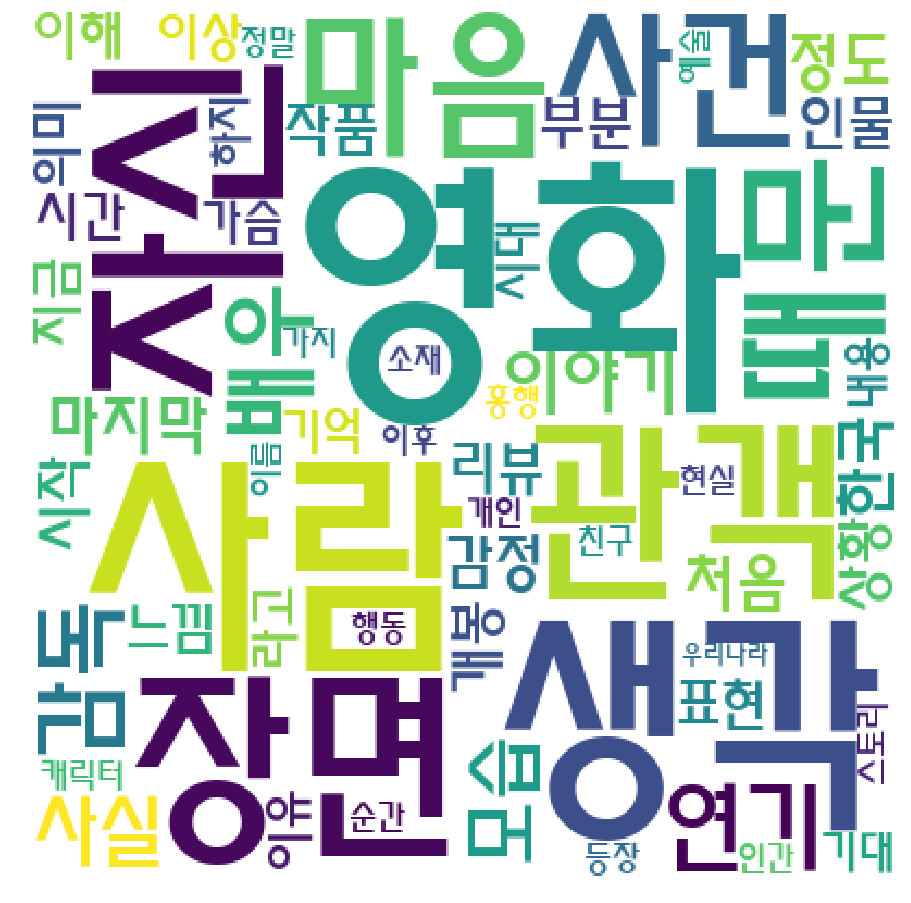

In [174]:
params = {
    "width"            : 400,
    "height"           : 400,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(result_dome['Sum']) 

save_img = 'wc_result/dome.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

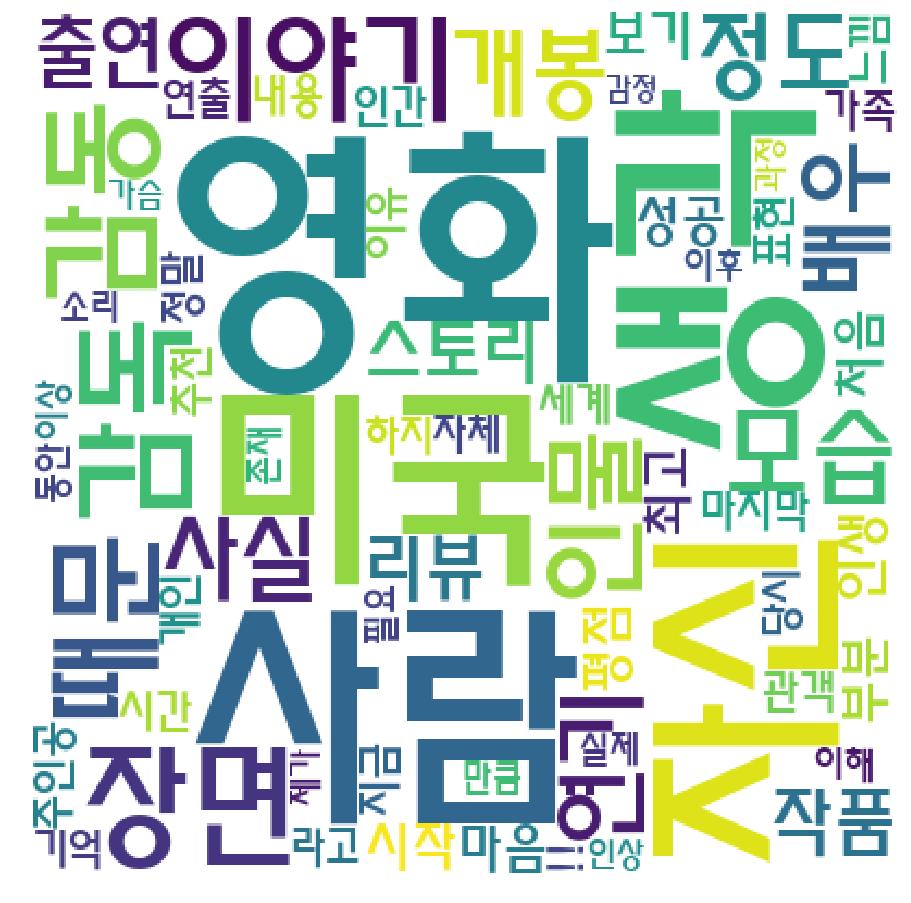

In [175]:
params = {
    "width"            : 400,
    "height"           : 400,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(result_onb['Sum']) 

save_img = 'wc_result/onb.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

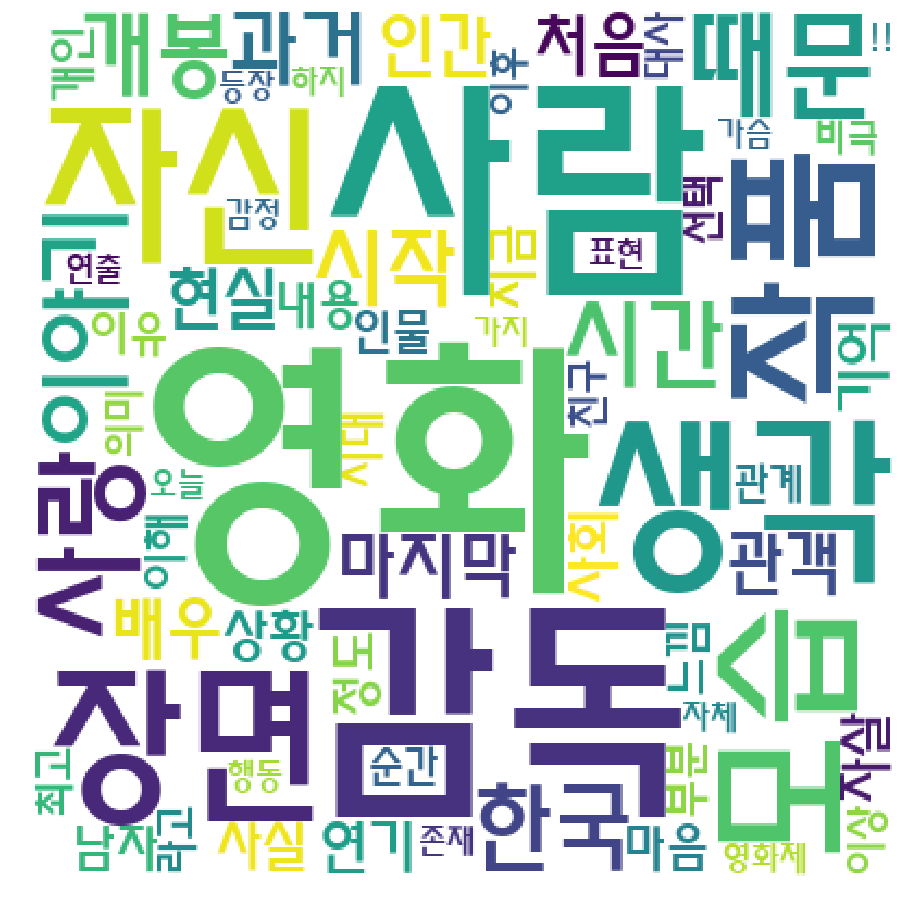

In [176]:
params = {
    "width"            : 400,
    "height"           : 400,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(result_redome['Sum']) 

save_img = 'wc_result/redome.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

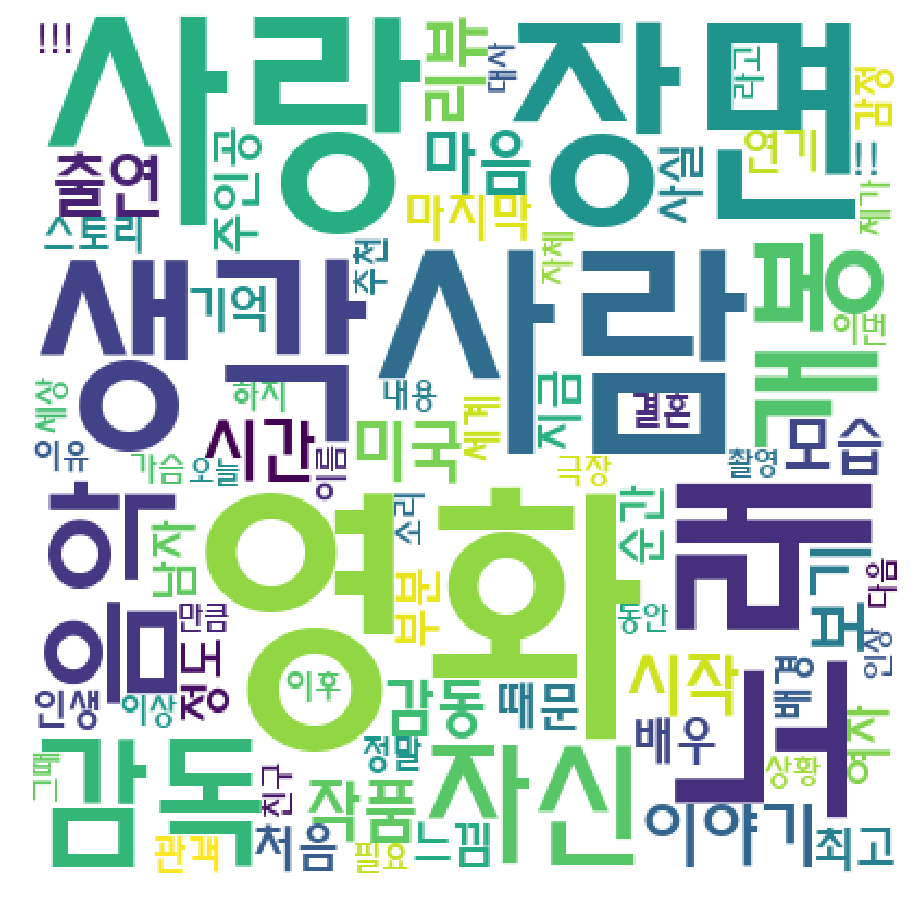

In [177]:
params = {
    "width"            : 400,
    "height"           : 400,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(result_reonb['Sum']) 

save_img = 'wc_result/reonb.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)